# Objective



**HR Analytics: Job change of Data Scientists**

HR Analytics: Job change of Data Scientists project is to predict if a candidate will work for the company or will move to a new job.
There are 13 features provided with data and 1 target variable.

The objective of the project is to predict the probability of a candidate to look for a new job or will work for the company.

A binary target variable : 0 – Not looking for job change, 1 – Looking for a job change.

Most features are categorical (Nominal, Ordinal, Binary).There are some missing values. The challenge with data is that the data set is imbalanced.


**What kind of ML experiment would I be curious to perform with it?**

I would like to explore data (EDA) and clean data and then use classification algorithms like Logistic Regression, Decision Tree, Random Forest, Support Vector Machine and K Nearest Neighbors on training data. 


Also, deal with the imbalance of data.


Lastly,check the performance on validation data and finally on test data.

<br>

Data Available in [Kaggle](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists).


Take aways from others work:

Decision tree out-performed the other models. This means that if we want to predict which candidates would be most likely to change jobs based on our features, we would use the Decision Tree Model.

The AUC score for DT is higher than other models, the better the performance of the model at distinguishing between the positive and negative classes. So Decision Tree is the best choice in this case. Also predicting the probability of a candidate to look for a new job or will work for the company is possible.



* Stratified data split might help.

* Label encoding or dummy variable ie one-hot encoding may be used.

Since here DT seems to be the best approach,

* LightGBM classifier can be used.  Light GBM is a fast, distributed, high-performance gradient boosting framework based on a decision tree algorithm, used for ranking, classification and many other machine learning tasks.

<br>

*We do not focus on hyperparameter tuning in this project. There are algorithms like Bayesian optimization for Hyperparameter optimization. Bayesian optimization methods are efficient because they select hyperparameters in an informed manner. In Grid Search you try all the possible hyperparameter combinations within some ranges.The project can be enhanced further using hyperparameter tuning.*


what differentiates my work from other notebooks?

<br>

**The focus of this project is**<br> 


* **Visualization**

* **Imbalance of data**

<br>

We use python profiling, matplotlib, seaborn to help us visualize data and understand patterns.

<br>


The challenge with data is that the data set is imbalanced. To deal with this, Random sampling is performed. SMOTE and Borderline SMOTE is performed and then applying the data for above mentioned classification algorithms to see how this would enhance the performance of the models.

Connect to Google Drive

Mount the drive for accessing data.
Data is stored in ML_project folder.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/ML_project
import os, sys
sys.path.append(os.getcwd())

/content/drive/My Drive/Colab Notebooks/ML_project



# Import Libaries

Import nescessary Libraries



In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.pipeline

import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings("ignore")

import pandas_profiling
from pandas_profiling import ProfileReport
from scipy import stats
from scipy.stats import chi2_contingency

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, make_scorer

# Load Data

In [ ]:
train = pd.read_csv("aug_train.csv")
test = pd.read_csv("aug_test.csv")

train and test are dataframes containing the train and test data.

In [ ]:
print(type(train))
print(type(test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


# Exploratory Data Analysis (EDA)

In [ ]:
print("training data shape (r,c):  ",train.shape)
print("testing data shape (r,c):  ",test.shape)

training data shape (r,c):   (19158, 14)
testing data shape (r,c):   (2129, 13)


In [ ]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [ ]:
test.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')

In [ ]:
train['target'].unique()

array([1., 0.])

### ProfileReport - Training data

In order to get a detailed report on the data we have, we have an amazing tool pandas_profiling to do this task. And through the report that we obtained, we were able to obtain high-quality results about the data, so it is better to see them.

In [ ]:
#!pip install pandas_profiling==2.5.0

In [ ]:
profile_train = ProfileReport(train , title="Job Change of Data Scientists training_data profiling report ")
profile_test = ProfileReport(test , title="Job Change of Data Scientists testing_data profiling report ")

In [ ]:
profile_train




**The Data**

**We use the training data set provided by the "HR Analytics: Job Change of Data Scientists" Kaggle competition. This data set has 19158 rows and 14 columns.**


Columns are as follows:

- enrollee_id : Unique ID for candidate

- city: City code

- city_ development _index : Developement index of the city (scaled)

- gender: Gender of candidate

- relevent_experience: Relevant experience of candidate

- enrolled_university: Type of University course enrolled if any

- education_level: Education level of candidate

- major_discipline :Education major discipline of candidate

- experience: Candidate total experience in years

- company_size: No of employees in current employer's company

- company_type : Type of current employer

- lastnewjob: Difference in years between previous job and current job

- training_hours: training hours completed

- target: 0 – Not looking for job change, 1 – Looking for a job change

**We use the testing data set provided by the "HR Analytics: Job Change of Data Scientists" Kaggle competition. This data set has 2129 rows and 13 columns.**



We are going to go through each variable seperately, clean it, perform EDA, and prepare it for modeling. Starting with categorical variables and ending with numeric variables. It should be noted that for all our categorical missing values, we choose to keep them and use them for the analysis. This is because there is a lot of valuable information in missing data and deleting it could change the character of the data set. For the numeric variables, missing data is filled in with random samples of that column because there is a very small number of missing values. 

In [ ]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
enrollee_id               19158 non-null int64
city                      19158 non-null object
city_development_index    19158 non-null float64
gender                    14650 non-null object
relevent_experience       19158 non-null object
enrolled_university       18772 non-null object
education_level           18698 non-null object
major_discipline          16345 non-null object
experience                19093 non-null object
company_size              13220 non-null object
company_type              13018 non-null object
last_new_job              18735 non-null object
training_hours            19158 non-null int64
target                    19158 non-null float64
dtypes: float64(2), int64(2), object(10)
memory usage: 2.0+ MB


Here, we have 2 numeric variables and the rest are categorical variables. last_new_job and experience columns will later be changed to numeric data types giving us 4 numeric variables total.

In [ ]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [ ]:
def find_missing_value(data):
    nulls = data.isnull().sum()

    for index,item in nulls.items():
        if item>0:
            print(f"Index : {index}, Value : {item}")  
find_missing_value(train)

Index : gender, Value : 4508
Index : enrolled_university, Value : 386
Index : education_level, Value : 460
Index : major_discipline, Value : 2813
Index : experience, Value : 65
Index : company_size, Value : 5938
Index : company_type, Value : 6140
Index : last_new_job, Value : 423


We see that a little over half of the columns contain missing values so we will have to work with them in each column going forward. 

In [ ]:
train.describe()

enrollee_id  city_development_index  training_hours        target
count  19158.000000            19158.000000    19158.000000  19158.000000
mean   16875.358179                0.828848       65.366896      0.249348
std     9616.292592                0.123362       60.058462      0.432647
min        1.000000                0.448000        1.000000      0.000000
25%     8554.250000                0.740000       23.000000      0.000000
50%    16982.500000                0.903000       47.000000      0.000000
75%    25169.750000                0.920000       88.000000      0.000000
max    33380.000000                0.949000      336.000000      1.000000

In [ ]:
train.head()

enrollee_id      city  ...  training_hours target
0         8949  city_103  ...              36    1.0
1        29725   city_40  ...              47    0.0
2        11561   city_21  ...              83    0.0
3        33241  city_115  ...              52    1.0
4          666  city_162  ...               8    0.0

[5 rows x 14 columns]

## Correlation between columns of train data


In [ ]:
train.corr()

enrollee_id  ...    target
enrollee_id                1.000000  ...  0.049475
city_development_index    -0.040455  ... -0.341665
training_hours             0.000998  ... -0.021577
target                     0.049475  ...  1.000000

[4 rows x 4 columns]

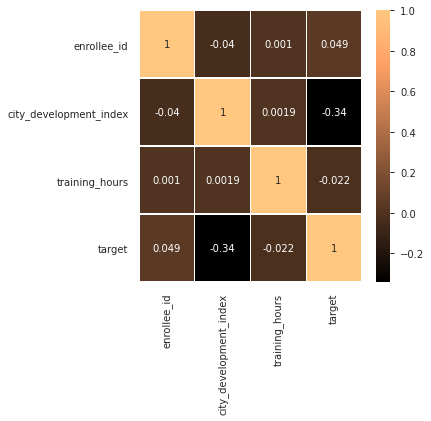

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(train.corr(), annot=True, linewidths=.5, ax=ax, cmap='copper')
plt.show()

**Correlations between more than one feature and target using Violin Plot**

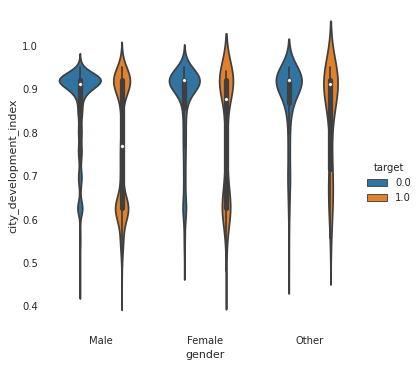

In [ ]:
#gender, city_development_index, target
sns.catplot(x="gender", y="city_development_index", hue='target',
            kind="violin", split=False, data=train, scale="area", scale_hue=False)
#The area of each violin is set to the same by 'scale="area", scale_hue=False'
plt.show()

The *white dot* on the violin plot is the median line similar to the *dark line* inside the box for box plot.

**Correlations between more than one feature and target using Box Plot**

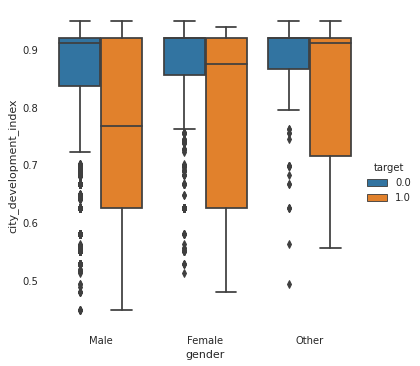

In [ ]:
#gender, city_development_index, target
sns.catplot(x="gender", y="city_development_index", hue='target',
            kind="box", data=train)
#The area of each violin is set to the same by 'scale="area", scale_hue=False'
plt.show()

## Count of data available for each targets


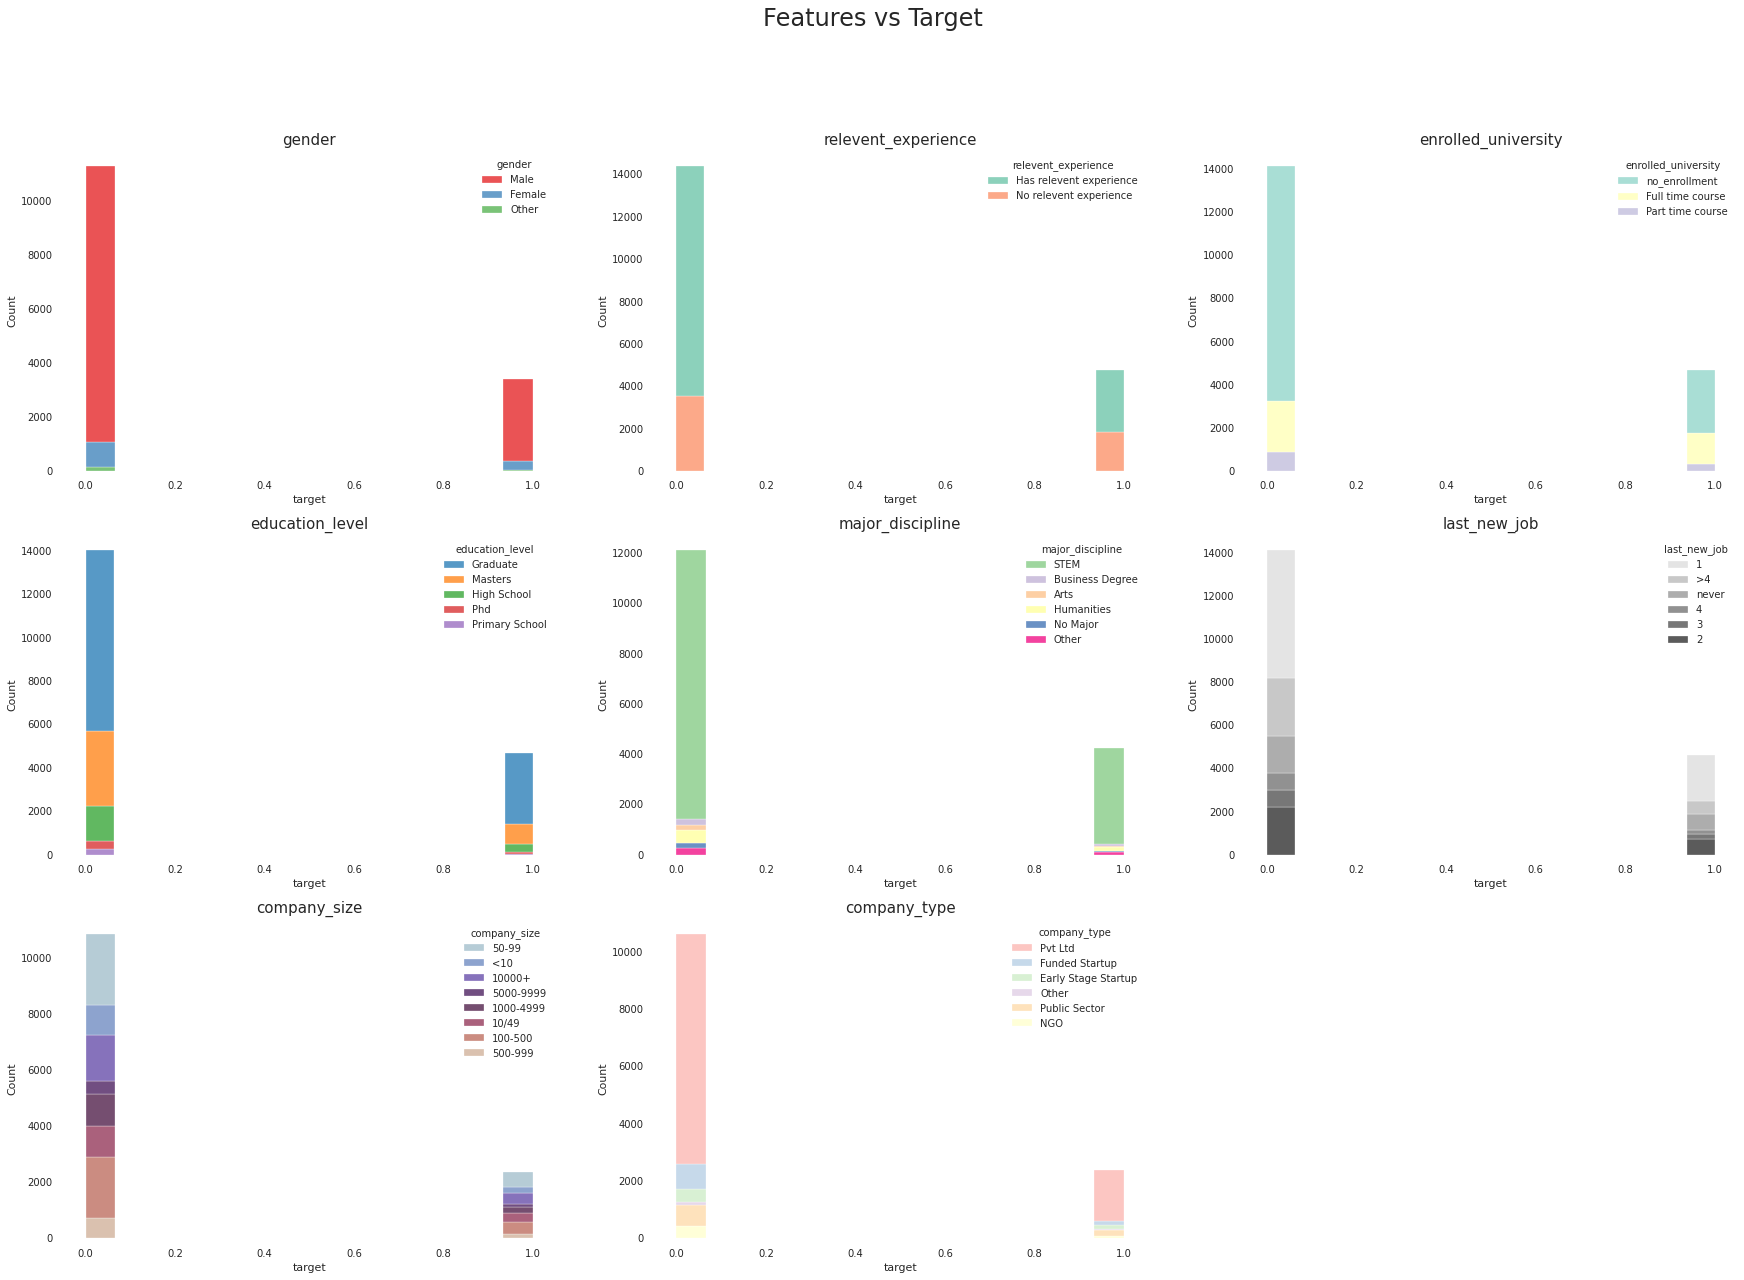

In [ ]:
fig = plt.figure(figsize=(30,20))

gs = fig.add_gridspec(3,3)

ax00 = fig.add_subplot(gs[0,0])
ax01 = fig.add_subplot(gs[0,1])
ax02 = fig.add_subplot(gs[0, 2])
ax10 = fig.add_subplot(gs[1,0])
ax11 = fig.add_subplot(gs[1,1])
ax12 = fig.add_subplot(gs[1,2])

ax06 = fig.add_subplot(gs[2,0])
ax07 = fig.add_subplot(gs[2,1])
#ax05 = fig.add_subplot(gs[2,2])

ax00.set_title('gender', fontsize=15)
ax01.set_title('relevent_experience', fontsize=15)
ax02.set_title('enrolled_university', fontsize=15)
ax10.set_title('education_level', fontsize=15)
ax11.set_title('major_discipline', fontsize=15)
ax12.set_title('last_new_job', fontsize=15)

ax06.set_title('company_size', fontsize = 15)
ax07.set_title('company_type', fontsize = 15)
#ax05.set_title('experience', fontsize = 15)

ax00.tick_params(labelsize=10)
ax01.tick_params(labelsize=10)
ax02.tick_params(labelsize=10)
ax10.tick_params(labelsize=10)
ax11.tick_params(labelsize=10)
ax12.tick_params(labelsize=10)

ax06.tick_params(labelsize=10)
ax07.tick_params(labelsize=10)
#ax05.tick_params(labelsize=10)

sns.histplot(data = train,x="target", kde=False, ax =ax00, hue="gender", palette="Set1", multiple="stack")
sns.histplot(data = train,x="target", kde=False, ax =ax01, hue="relevent_experience", palette="Set2", multiple="stack")
sns.histplot(data = train,x="target", kde=False, ax =ax02, hue="enrolled_university", palette="Set3", multiple="stack")
sns.histplot(data = train,x="target", kde=False, ax =ax10, hue="education_level", palette="tab10", multiple="stack")
sns.histplot(data = train,x="target", kde=False, ax =ax11, hue="major_discipline", palette="Accent", multiple="stack")
sns.histplot(data = train,x="target", kde=False, ax =ax12, hue="last_new_job", palette="binary", multiple="stack")
#sns.histplot(data = train,x="target", kde=False, ax =ax05, hue="experience", palette="autumn", multiple="stack")
sns.histplot(data = train,x="target", kde=False, ax =ax06, hue="company_size", palette="twilight", multiple="stack")
sns.histplot(data = train,x="target", kde=False, ax =ax07, hue="company_type", palette="Pastel1", multiple="stack")

fig.subplots_adjust()
fig.suptitle('Features vs Target', fontsize="24");

In [ ]:
 # for visualization
train_df = train
test_df = test
aug_train = train
aug_test = test

In [ ]:
#on train data set
aug_train['last_new_job'] = aug_train['last_new_job'].apply(lambda x: 'Never' if x == 'never' else x) #just reads nicer
aug_train['enrolled_university'][aug_train['enrolled_university'] == 'no_enrollment'] = 'No Enrollment' #just reads nicer
aug_train['company_size'] = aug_train['company_size'].apply(lambda x: '10-49' if x == '10/49' else x) #diff replacement method

aug_train['experience'] = aug_train['experience'].apply(lambda x: '0' if x == '<1' else x)
aug_train['experience'] = aug_train['experience'].apply(lambda x: '20' if x == '>20' else x)


aug_train['company_size'].fillna('0',inplace=True)
aug_train['company_type'].fillna('Unknown',inplace=True)
aug_train['major_discipline'].fillna('Unknown',inplace=True)
aug_train['gender'].fillna('Not provided',inplace=True)

# Repeat steps on test data set
aug_test['last_new_job'] = aug_test['last_new_job'].apply(lambda x: 'Never' if x == 'never' else x) #just reads nicer
aug_test['enrolled_university'][aug_test['enrolled_university'] == 'no_enrollment'] = 'No Enrollment' #just reads nicer
aug_test['company_size'] = aug_test['company_size'].apply(lambda x: '10-49' if x == '10/49' else x) #diff replacement method

aug_test['experience'] = aug_test['experience'].apply(lambda x: '0' if x == '<1' else x)
aug_test['experience'] = aug_test['experience'].apply(lambda x: '20' if x == '>20' else x)

aug_test['company_size'].fillna('0',inplace=True)
aug_test['company_type'].fillna('Unknown',inplace=True)
aug_test['major_discipline'].fillna('Unknown',inplace=True)
aug_test['gender'].fillna('Not provided',inplace=True)

# mean with respect to the gender categories
aug_train['target'].groupby(aug_train['gender']).mean()

gender
Female          0.263328
Male            0.227819
Not provided    0.308119
Other           0.261780
Name: target, dtype: float64

ordering categorical variables gives much more control over visuals and enables the story trying to tell.

In [ ]:
# Ordering

ed_order = ['Primary School','High School','Graduate','Masters','Phd']
enroll_order = ['No Enrollment','Part time course','Full time course']
disc_order = ['STEM','Unknown','Humanities','Other','Business Degree','Arts','No Major']
exp_yrs_order = ['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']
exp_yrs_order_2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
size_order = ['0','<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
job_order = ['Never', '1', '2', '3', '4', '>4']
exp_order =['No relevant experience','Has relevant experience']
gender_order = ['Male','Female','Other','Not provided']
company_order = ['Pvt Ltd','Unknown','Funded Startup','Public Sector','Early Stage Startup','NGO','Other']



In [ ]:
# droping the remaining missing data

aug_train.dropna(inplace=True)
aug_test.dropna(inplace=True)
aug_train.isna().sum()/len(aug_train)


enrollee_id               0.0
city                      0.0
city_development_index    0.0
gender                    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
major_discipline          0.0
experience                0.0
company_size              0.0
company_type              0.0
last_new_job              0.0
training_hours            0.0
target                    0.0
dtype: float64

In [ ]:
train_df = aug_train 
test_df = aug_test

In [ ]:
# Converting objects to integers

train_df['experience'] = train_df['experience'].astype(str).astype(int)
test_df['experience'] = test_df['experience'].astype(str).astype(int)

train_df['training_hours'] = train_df['training_hours'].astype(str).astype(int)
test_df['training_hours'] = test_df['training_hours'].astype(str).astype(int)


**This will be an EXPLORATORY visualization, as opposed to EXPLANATORY.**

 using **GridSpec** .

Let's see if we can understand why people might look for a new job...

The colour palette used is below:

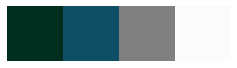

In [ ]:
sns.palplot(['#002d1d','#0e4f66','gray','#fbfbfb'])

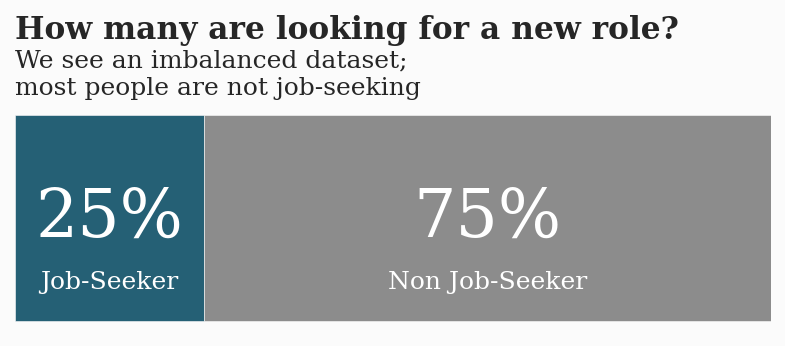

In [ ]:
x=train_df.groupby(['target'])['target'].count()
y=len(train_df)
r=((x/y)).round(2)
ratio = pd.DataFrame(r).T


fig, ax = plt.subplots(1,1,figsize=(6.5, 2),dpi=150)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color) 

ax.barh(ratio.index, ratio[1.0], color='#0e4f66', alpha=0.9, ec=background_color, label='Job-Seeker')
ax.barh(ratio.index, ratio[0.0], left=ratio[1.0], color='gray', alpha=0.9,ec=background_color, label='Non Job-Seeker')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend().set_visible(False)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[1.0][i]*100)}%", xy=(ratio[1.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("Job-Seeker", xy=(ratio[1.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')
    
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[0.0][i]*100)}%", xy=(ratio[1.0][i]+ratio[0.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("Non Job-Seeker", xy=(ratio[1.0][i]+ratio[0.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')


fig.text(0.125,1.1,'How many are looking for a new role?', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'We see an imbalanced dataset;\nmost people are not job-seeking',fontfamily='serif',fontsize=12)  


plt.show()

**We have an imbalanced dataset - that is, many more non job-seekers than job-seekers.**

We call such a dataset to exhibit class imbalance. The normal class is referred to as the majority class and the rare class is called the minority class.

## Profile Report - Test data

In [ ]:
profile_test

### Similarity check between train and test data

Visualizing the train and test data to look for similarity. 

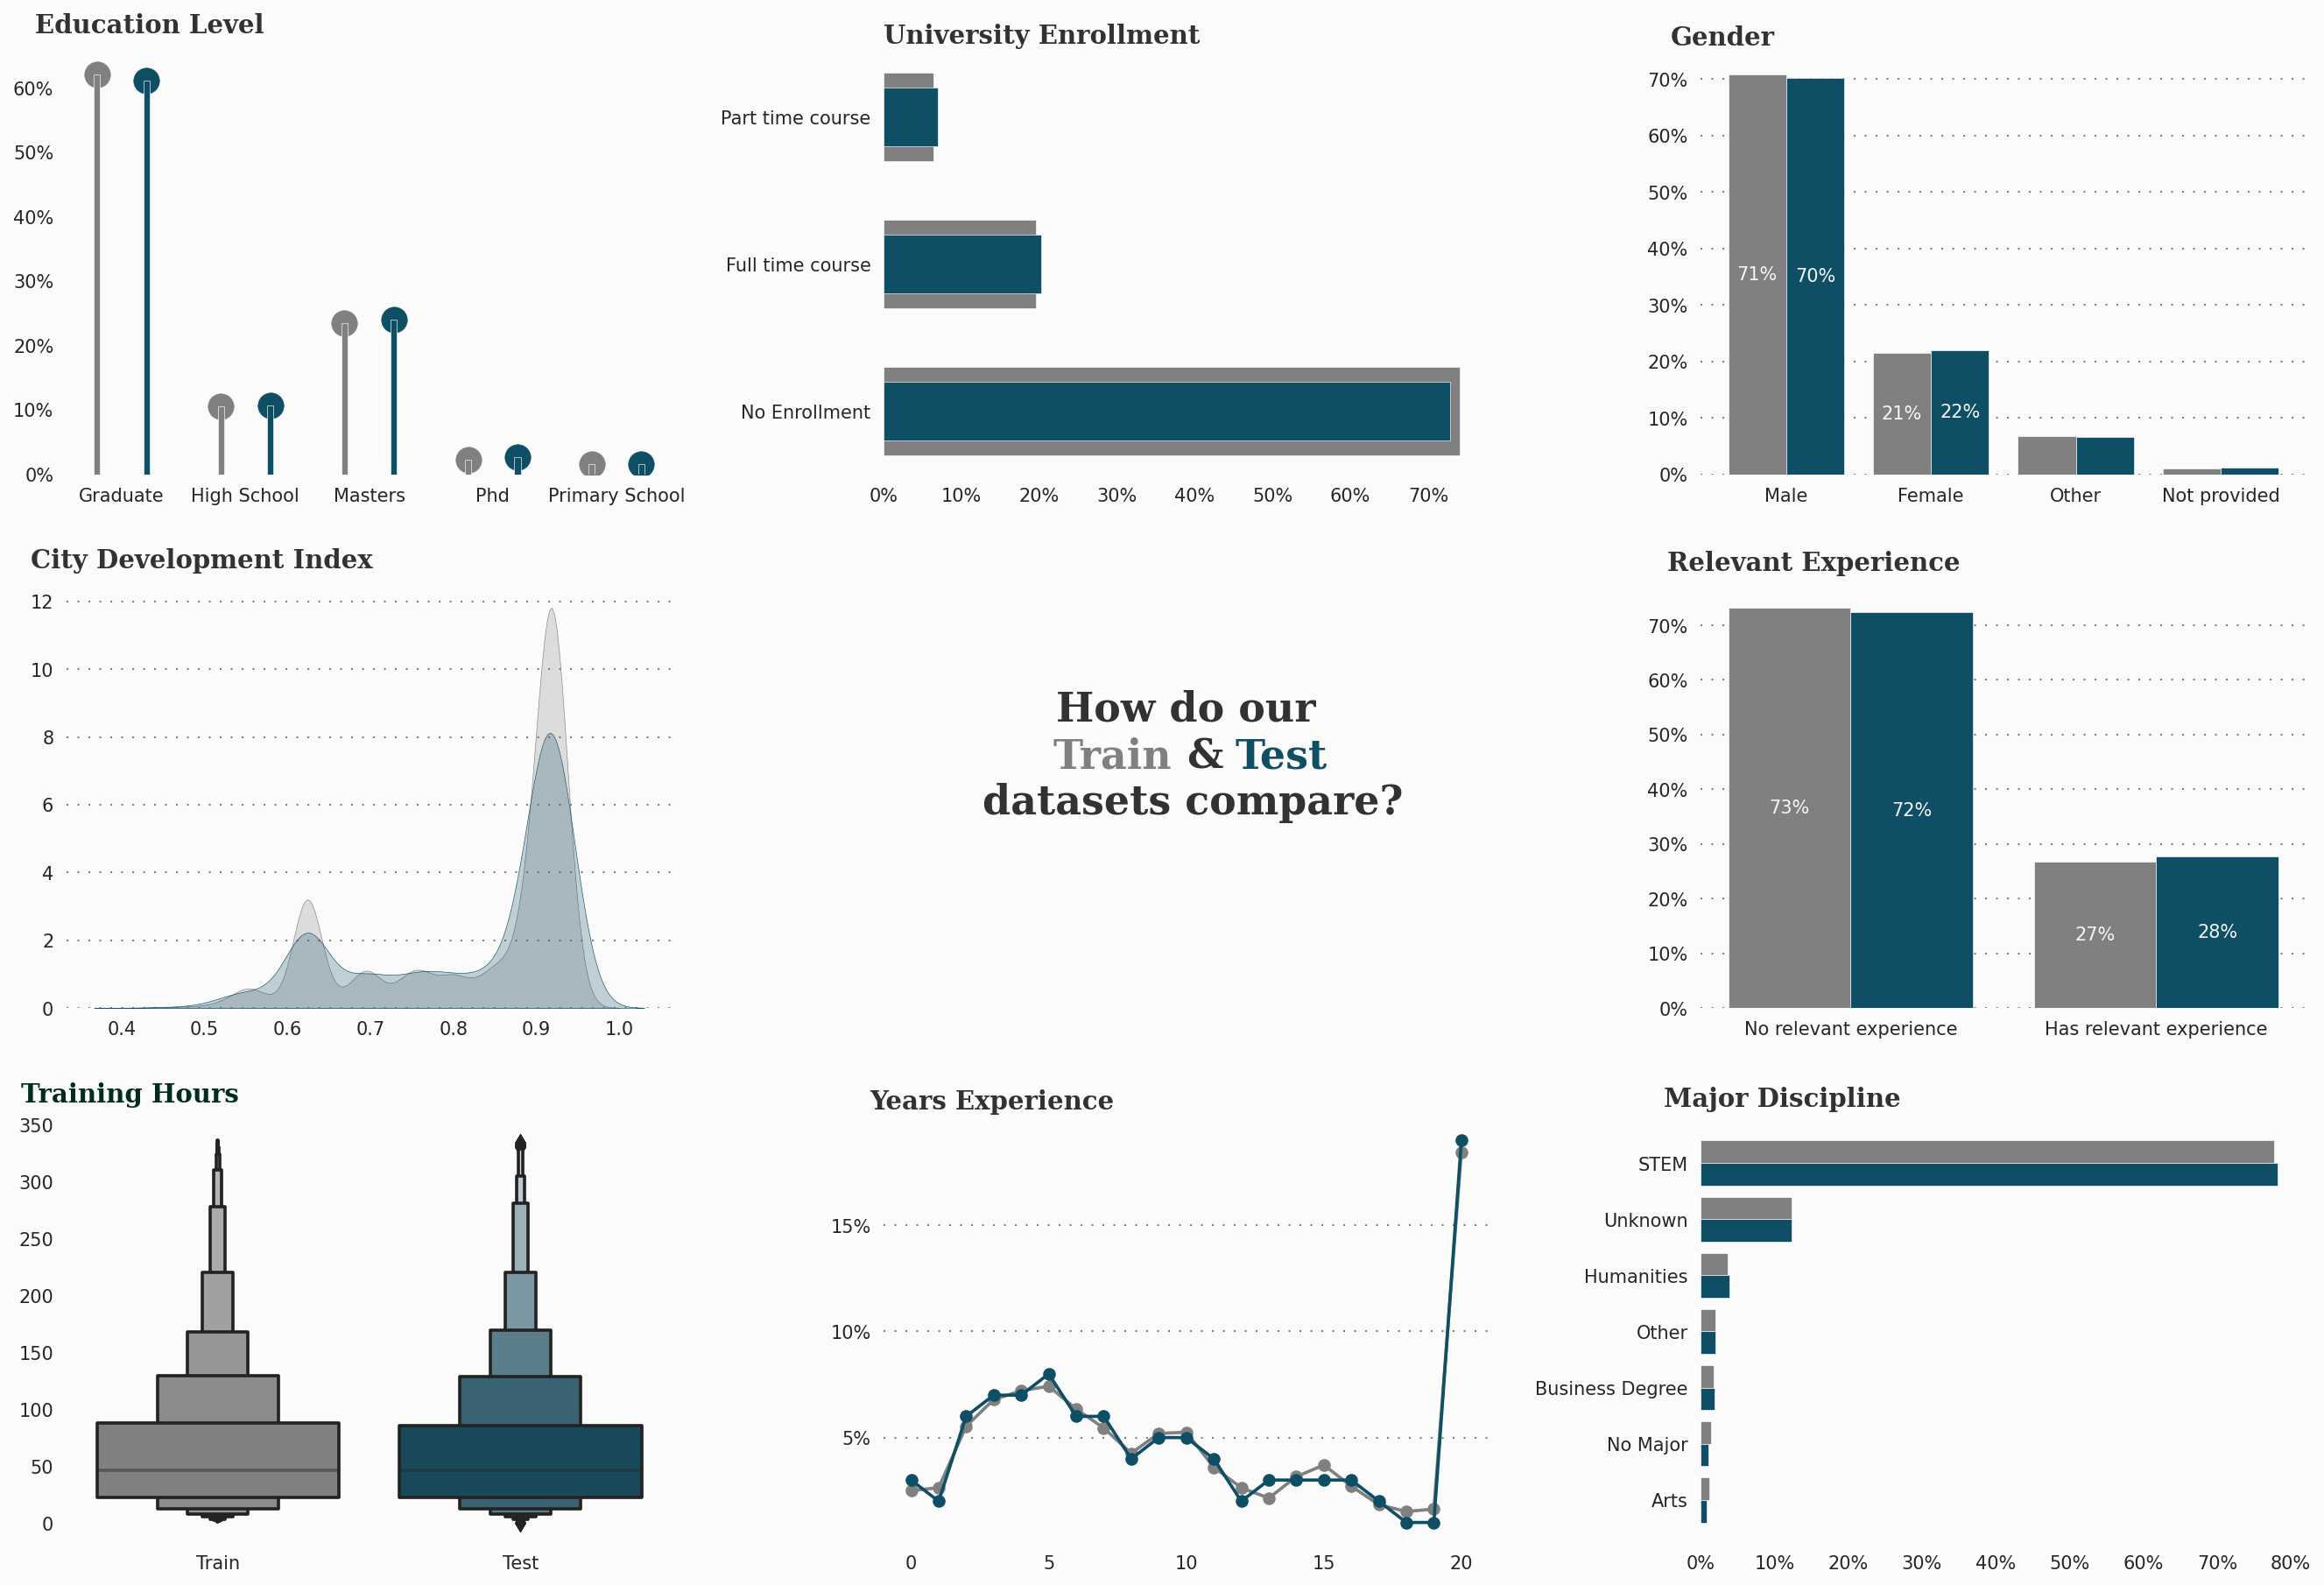

In [ ]:
background_color = "#fbfbfb"

fig = plt.figure(figsize=(22,15),dpi=150)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])


# Ax0 - EDUCATION LEVEL
train = pd.DataFrame(train_df["education_level"].value_counts())
train["Percentage"] = train["education_level"].apply(lambda x: x/sum(train["education_level"])*100)
train = train.sort_index()

test = pd.DataFrame(test_df["education_level"].value_counts())
test["Percentage"] = test["education_level"].apply(lambda x: x/sum(test["education_level"])*100)
test = test.sort_index()

ax0.bar(np.arange(len(train.index)), height=train["Percentage"], zorder=3, color="gray", width=0.05)
ax0.scatter(np.arange(len(train.index)), train["Percentage"], zorder=3,s=200, color="gray")
ax0.bar(np.arange(len(test.index))+0.4, height=test["Percentage"], zorder=3, color="#0e4f66", width=0.05)
ax0.scatter(np.arange(len(test.index))+0.4, test["Percentage"], zorder=3,s=200, color="#0e4f66")
ax0.text(-0.5, 68.5, 'Education Level', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax0.set_xticks(np.arange(len(train.index))+0.4 / 2)
ax0.set_xticklabels(list(train.index),rotation=0)


# Ax1 - ENROLLED IN UNIVESITY
train = pd.DataFrame(train_df["enrolled_university"].value_counts())
train["Percentage"] = train["enrolled_university"].apply(lambda x: x/sum(train["enrolled_university"])*100).loc[enroll_order]
test = pd.DataFrame(test_df["enrolled_university"].value_counts())
test["Percentage"] = test["enrolled_university"].apply(lambda x: x/sum(test["enrolled_university"])*100).loc[enroll_order]

ax1.text(0, 2.5, 'University Enrollment', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.barh(train.index, train['Percentage'], color="gray", zorder=3, height=0.6)
ax1.barh(test.index, test['Percentage'], color="#0e4f66", zorder=3, height=0.4)
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(10))

###
# Ax2 - GENDER 
train = pd.DataFrame(train_df["gender"].value_counts())
train["Percentage"] = train["gender"].apply(lambda x: x/sum(train["gender"])*100)
test = pd.DataFrame(test_df["gender"].value_counts())
test["Percentage"] = test["gender"].apply(lambda x: x/sum(test["gender"])*100)

x = np.arange(len(train))
ax2.text(-0.6, 76, 'Gender', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.bar(x, height=train["Percentage"], zorder=3, color="gray", width=0.4)
ax2.bar(x+0.4, height=test["Percentage"], zorder=3, color="#0e4f66", width=0.4)
ax2.set_xticks(x + 0.4 / 2)
ax2.set_xticklabels(['Male','Female','Other','Not provided'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i,j in zip([0, 1], train["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], test["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
    

    
## Ax 3 - CDI

ax3.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
train = pd.DataFrame(train_df["city_development_index"])
test = pd.DataFrame(test_df["city_development_index"])
sns.kdeplot(train["city_development_index"], ax=ax3,color="gray", shade=True, label="Train")
sns.kdeplot(test["city_development_index"], ax=ax3, color="#0e4f66", shade=True, label="Test")
ax3.text(0.29, 13, 'City Development Index', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax3.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax3.set_ylabel('')    
ax3.set_xlabel('')

## AX4 - TITLE

ax4.spines["bottom"].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5, 0.6, 'How do our\n\n datasets compare?', horizontalalignment='center', verticalalignment='center',fontsize=22, fontweight='bold', fontfamily='serif', color="#323232")
ax4.text(0.28,0.57,"Train", fontweight="bold", fontfamily='serif', fontsize=22, color='gray')
ax4.text(0.5,0.57,"&", fontweight="bold", fontfamily='serif', fontsize=22, color='#323232')
ax4.text(0.58,0.57,"Test", fontweight="bold", fontfamily='serif', fontsize=22, color='#0e4f66')




### Ax5 - RELEVANT EXPERIENCE
train = pd.DataFrame(train_df["relevent_experience"].value_counts())
train["Percentage"] = train["relevent_experience"].apply(lambda x: x/sum(train["relevent_experience"])*100)
test = pd.DataFrame(test_df["relevent_experience"].value_counts())
test["Percentage"] = test["relevent_experience"].apply(lambda x: x/sum(test["relevent_experience"])*100)
x = np.arange(len(train))
ax5.text(-0.4, 80, 'Relevant Experience', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax5.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax5.bar(x, height=train["Percentage"], zorder=3, color="gray", width=0.4)
ax5.bar(x+0.4, height=test["Percentage"], zorder=3, color="#0e4f66", width=0.4)
ax5.set_xticks(x + 0.4 / 2)
ax5.set_xticklabels(['No relevant experience','Has relevant experience'])
ax5.yaxis.set_major_formatter(mtick.PercentFormatter())
ax5.yaxis.set_major_locator(mtick.MultipleLocator(10))

for i,j in zip([0, 1, 2], train["Percentage"]):
    ax5.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1, 2], test["Percentage"]):
    ax5.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

    
    
# Ax6 - TRAINING HOURS
train = pd.DataFrame(train_df["training_hours"])
train["TrainTest"] = "Train"
test = pd.DataFrame(test_df["training_hours"])
test["TrainTest"] = "Test"
ax6.text(-0.65, 370, 'Training Hours', fontsize=14, fontweight='bold', fontfamily='serif', color="#002d1d")
comb_graph_temp_df = pd.concat([train, test], axis=0)
sns.boxenplot(ax=ax6, y="training_hours", x="TrainTest", data=comb_graph_temp_df, palette=["gray", "#0e4f66"])
ax6.set_xlabel("")
ax6.set_ylabel("")


# Ax7 - EXPERIENCE YRS
train = pd.DataFrame(train_df["experience"].value_counts())
train["Percentage"] = train["experience"].apply(lambda x: x/sum(train["experience"])*100)
train = train.sort_index()
test = pd.DataFrame(test_df["experience"].value_counts())
test["Percentage"] = round(test["experience"].apply(lambda x: x/sum(test["experience"])*100),).astype(int)
test = test.sort_index()
ax7.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax7.plot(train.index, train["Percentage"], zorder=3, color="gray", marker='o')
ax7.plot(test.index, test["Percentage"], zorder=3, color="#0e4f66", marker='o')
ax7.text(-1.5, 20.5, 'Years Experience', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax7.set_yticklabels(labels = ['0   ', '5%','10%','15%'])
ax7.xaxis.set_major_locator(mtick.MultipleLocator(5))
ax7.yaxis.set_major_locator(mtick.MultipleLocator(5))


# Ax8 - MAJOR DISCIPLINE
train = pd.DataFrame(train_df["major_discipline"].value_counts())
train["Percentage"] = train["major_discipline"].apply(lambda x: x/sum(train["major_discipline"])*100)
test = pd.DataFrame(test_df["major_discipline"].value_counts())
test["Percentage"] = test["major_discipline"].apply(lambda x: x/sum(test["major_discipline"])*100)

ax8.barh(np.arange(len(train.index)), train["Percentage"], zorder=3, color="gray", height=0.4)
ax8.barh(np.arange(len(test.index))+0.4, test["Percentage"], zorder=3, color="#0e4f66", height=0.4)
ax8.text(-5, -0.8, 'Major Discipline', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax8.xaxis.set_major_formatter(mtick.PercentFormatter())
ax8.yaxis.set_major_locator(mtick.MultipleLocator(1))
ax8.set_yticks(np.arange(len(test.index))+0.4 / 2)
ax8.set_yticklabels(list(test.index))
ax8.invert_yaxis()



for i in range(0,9):
    locals()["ax"+str(i)].set_facecolor(background_color) 
    
for i in range(0,9):
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)


for s in ["top","right","left"]:
    for i in range(0,9):
        locals()["ax"+str(i)].spines[s].set_visible(False)

plt.show()

**The Train & Tests datasets are similar**

In [ ]:
train = pd.read_csv("aug_train.csv")
test = pd.read_csv("aug_test.csv")

## Categorical variables

Each variables are explored in deep.

### City

In [ ]:
train['city'].value_counts()

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_121       3
city_129       3
city_111       3
city_171       1
city_140       1
Name: city, Length: 123, dtype: int64

There are 123 different cities in this data set.

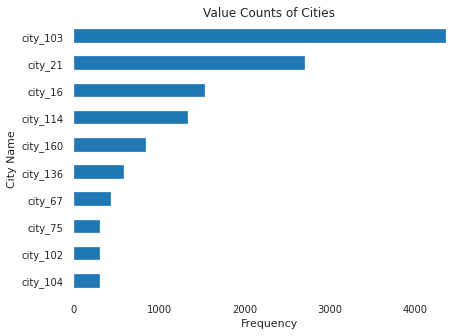

In [ ]:
plt.figure(figsize=(7,5))
# Top 10 cities
train['city'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh')
plt.title('Value Counts of Cities')
plt.xlabel('Frequency')
plt.ylabel('City Name');

Here we get the top 10 cities. city_103 has the most records with above 4,000. City 21 follows by with almost 3,000 records.

We chose not to use this variable as a predictor because we do not know which cities these actually are and what their significance may be. 

### Gender

In [ ]:
train['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

We choose to keep the missing data here and use it as a variable.

In [ ]:
# Change pandas na to an actual na value.
train['gender'].fillna('na', inplace=True)

Then we check na values in the dataframe for insights.

In [ ]:
train[train['gender'] == 'na']

enrollee_id      city  ...  training_hours target
2            11561   city_21  ...              83    0.0
3            33241  city_115  ...              52    1.0
5            21651  city_176  ...              24    1.0
9              699  city_103  ...             123    0.0
10           29452   city_21  ...              32    1.0
...            ...       ...  ...             ...    ...
19140        11398  city_103  ...              15    0.0
19144        17191   city_21  ...              48    1.0
19145          155   city_44  ...             190    0.0
19148         9212   city_21  ...              40    1.0
19157        23834   city_67  ...             127    0.0

[4508 rows x 14 columns]

Nothing too out of the ordinary looking here.

Lets plot the data!

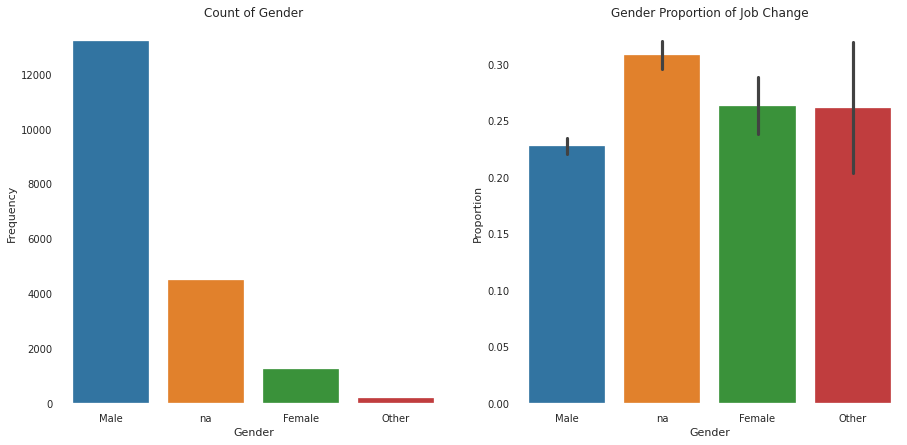

In [ ]:
plt.figure(figsize=(15,7))

plt.subplot(121)
sns.countplot(data=train, x='gender')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency');

plt.subplot(122)
sns.barplot(data=train, x='gender', y='target')
plt.title('Gender Proportion of Job Change')
plt.xlabel('Gender')
plt.ylabel('Proportion');

We see here that na values have a count higher than females and higher than other values. In the proportion bar graph we see that na gender values certainly have a higher percent of employee job change than any other value.

Lets take a closer look.

We create a table of counts for gender and the target.

In [ ]:
gender_table = pd.crosstab(train['gender'], train['target'])
gender_table

target    0.0   1.0
gender             
Female    912   326
Male    10209  3012
Other     141    50
na       3119  1389

Males take up most of the data set being thirteen times more than females.

Now we take a look at a table of proprtions.

In [ ]:
pd.crosstab(train['gender'], train['target'], normalize='index')

target       0.0       1.0
gender                    
Female  0.736672  0.263328
Male    0.772181  0.227819
Other   0.738220  0.261780
na      0.691881  0.308119

With proportions we see that females are more likely to change jobs than men. More importantly, we see that missing values have the highest proportion of job changers.

It looks like gender may play a part in predicting job changes so we do a chi squared test to test for statstical signficance of this.

In [ ]:
stat, p, dof, expected = chi2_contingency(gender_table)

# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 2.83304872204523e-25
Dependent (reject H0)


We reject the null hypothesis because we definetly have a p value lower than .05. It looks like gender will be a good feature to add to our model.

### Relevant Experience

Relevant experience is the relevant experience of the candidate. Whether they have any or do not have any relevant experience.



In [ ]:
train['relevent_experience'].value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

The number of people with relevant experience is more than double the amount of no relevant experience people.

We replace the value that has relevent experience to "yes" and no relevent experience to "no" to simplify things. 

In [ ]:
# replace the value has relevent experience to "yes" and no relevent experience to "no" in the column.
train['relevent_experience'] = train['relevent_experience'].replace('Has relevent experience', 'yes')
train['relevent_experience'] = train['relevent_experience'].replace('No relevent experience', 'no')


Plot the counts and proportions.

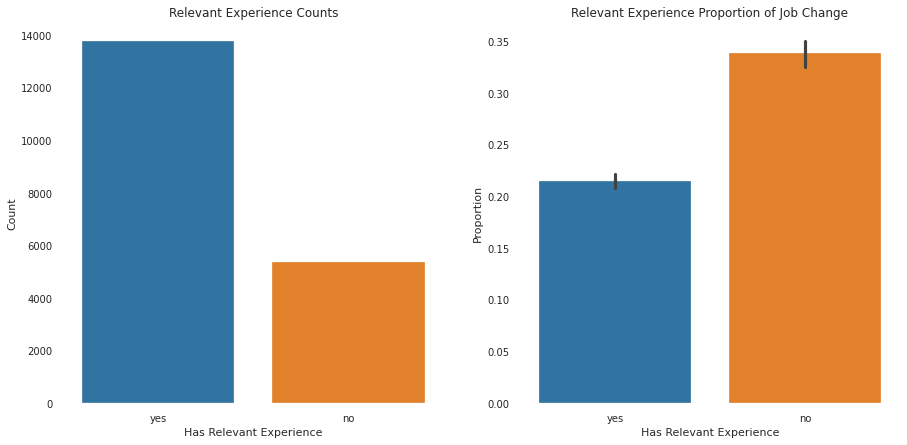

In [ ]:
plt.figure(figsize=(15,7))

plt.subplot(121)
sns.countplot(data=train, x='relevent_experience')
plt.title('Relevant Experience Counts')
plt.xlabel('Has Relevant Experience')
plt.ylabel('Count');

plt.subplot(122)
sns.barplot(data=train, x='relevent_experience', y='target')
plt.title('Relevant Experience Proportion of Job Change')
plt.xlabel('Has Relevant Experience')
plt.ylabel('Proportion');


People with relevant experience is more than double the amount of people without it. People without relevant experience are more than 10% more likely to be looking for another job.

To make sure of this difference we do another chi-squared test.

In [ ]:
exp_table = pd.crosstab(train['relevent_experience'], train['target'])

In [ ]:
pd.crosstab(train['relevent_experience'], train['target'], normalize = 'index')

target                    0.0       1.0
relevent_experience                    
no                   0.661573  0.338427
yes                  0.785310  0.214690

In [ ]:
stat, p, dof, expected = chi2_contingency(exp_table)

# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 1.5006628411178982e-70
Dependent (reject H0)


We reject the null hypothesis because we definetly have a p value lower than .05. It looks like relevant experience will be a good feature to add to our model.

### Enrolled University

Enrolled University tells us whether a person is in a full time course, part time course, or not enrolled in a university course.

In [ ]:
train['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

Most people are not enrolled in a university course.

We choose to fill missing values with na and use na as a value in this column. 

In [ ]:
train['enrolled_university'].fillna('na', inplace=True)

In [ ]:
train['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
na                    386
Name: enrolled_university, dtype: int64

na makes up 386 records in the data set.

lets plot it!

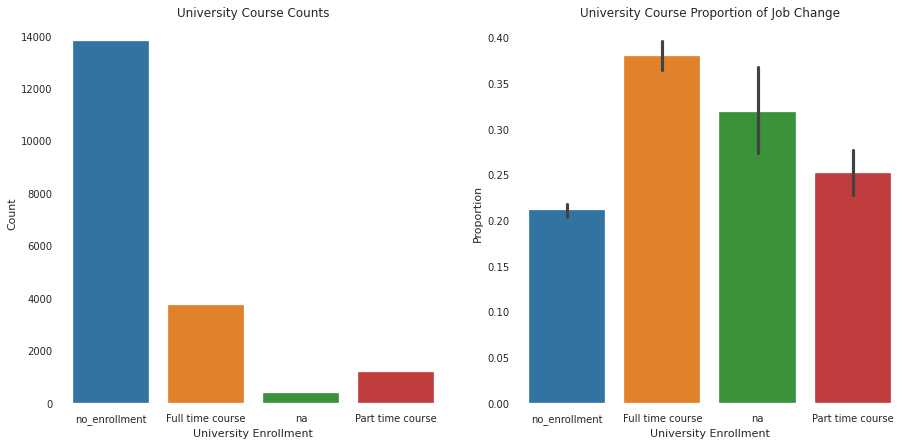

In [ ]:
plt.figure(figsize=(15,7))

plt.subplot(121)
sns.countplot(data=train, x='enrolled_university')
plt.title('University Course Counts')
plt.xlabel('University Enrollment')
plt.ylabel('Count');


plt.subplot(122)
sns.barplot(data=train, x='enrolled_university', y='target')
plt.title('University Course Proportion of Job Change')
plt.xlabel('University Enrollment')
plt.ylabel('Proportion');

Most people are not enrolled in university, while no enrollments also have the lowest percentage of people seeking a job change. People enrolled in full time courses have the highest proportion of people seeking a job change and na values come in second place.

We use a chi-squared test to test these differences.

In [ ]:
enrolled_table = pd.crosstab(train['enrolled_university'],train['target'])
pd.crosstab(train['enrolled_university'],train['target'], normalize = 'index')

target                    0.0       1.0
enrolled_university                    
Full time course     0.619111  0.380889
Part time course     0.747913  0.252087
na                   0.681347  0.318653
no_enrollment        0.788594  0.211406

In [ ]:
stat, p, dof, expected = chi2_contingency(enrolled_table)

# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject Null Hypothesis, H0)') 
else: 
    print('Independent (Null Hypothesis, H0 holds true)') 

p value is 3.809312475442323e-100
Dependent (reject Null Hypothesis, H0)


We reject the null hypothesis because we definitely have a p value lower than .05. It looks like university enrollment will be a good feature to add to our model.

### Education Level

Education level of the candidate (Phd, Masters, Graduate, High School, Primary School)

In [ ]:
train['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

Most people in the dataset are graduates.


We choose to fill missing values with na and use na as a value in this column. 

In [ ]:
train['education_level'].fillna('na', inplace=True)

In [ ]:
train['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
na                  460
Phd                 414
Primary School      308
Name: education_level, dtype: int64

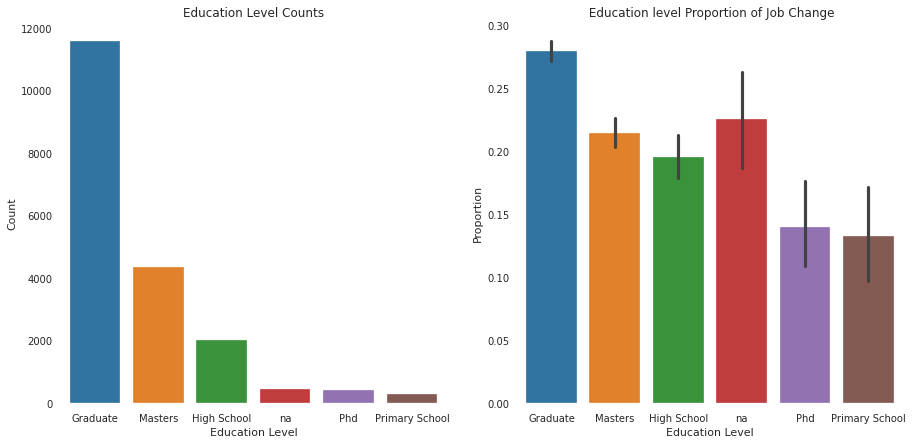

In [ ]:
plt.figure(figsize=(15,7))

plt.subplot(121)
sns.countplot(data=train, x='education_level')
plt.title('Education Level Counts')
plt.xlabel('Education Level')
plt.ylabel('Count');


plt.subplot(122)
sns.barplot(data=train, x='education_level', y='target')
plt.title(' Education level Proportion of Job Change')
plt.xlabel('Education Level')
plt.ylabel('Proportion');


Graduates make up more than half of every other value put together however, when it comes to the proportion of job change people, it only has a small lead. 

In [ ]:
edu_table = pd.crosstab(train['education_level'],train['target'])

In [ ]:
pd.crosstab(train['education_level'],train['target'], normalize = 'index')

target                0.0       1.0
education_level                    
Graduate         0.720210  0.279790
High School      0.804660  0.195340
Masters          0.785600  0.214400
Phd              0.859903  0.140097
Primary School   0.866883  0.133117
na               0.773913  0.226087

In [ ]:
stat, p, dof, expected = chi2_contingency(edu_table)

# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 2.787356885121268e-34
Dependent (reject H0)


Depsite the differences being smaller, we still reject the null hypothesis because we definitely have a p value lower than .05. Education level should be a good predictor.

### Major Discipline

College majors are put into general categories (STEM, Humanities, Other, Business Degree, Arts, No Major)

In [ ]:
train['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

Stem majors definitely make up the most of the data set.

We choose to fill missing values with na and use na as a value in this column. 

In [ ]:
train['major_discipline'].fillna('na', inplace=True)

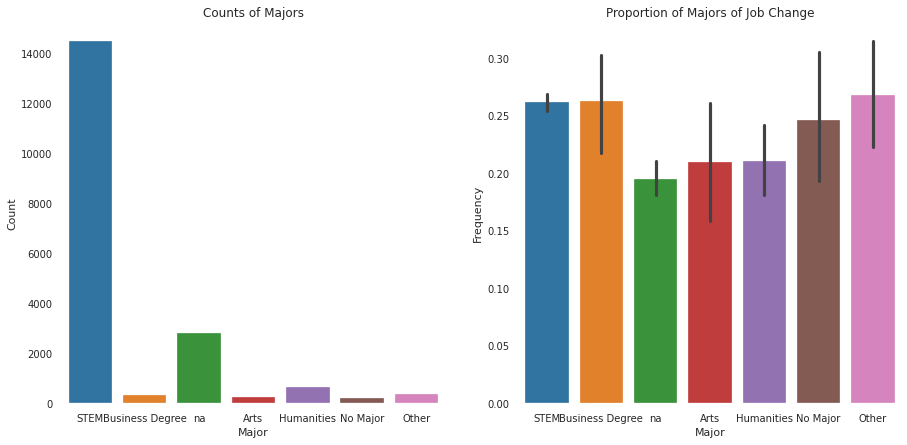

In [ ]:
plt.figure(figsize=(15,7))

plt.subplot(121)
sns.countplot(data=train, x='major_discipline')
plt.title('Counts of Majors')
plt.xlabel('Major')
plt.ylabel('Count');

plt.subplot(122)
sns.barplot(data=train, x='major_discipline', y='target')
plt.title('Proportion of Majors of Job Change')
plt.xlabel('Major')
plt.ylabel('Frequency');

Stem degrees in the data set are more than 7 times larger than any other major put together. Proportionally, stem degrees, business degrees, and other degrees are almost the same.

In [ ]:
major_table = pd.crosstab(train['major_discipline'],train['target'])

In [ ]:
pd.crosstab(train['major_discipline'],train['target'], normalize = 'index')

target                 0.0       1.0
major_discipline                    
Arts              0.790514  0.209486
Business Degree   0.737003  0.262997
Humanities        0.789238  0.210762
No Major          0.753363  0.246637
Other             0.732283  0.267717
STEM              0.738407  0.261593
na                0.804835  0.195165

In [ ]:
stat, p, dof, expected = chi2_contingency(major_table)

# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 6.22453676130265e-12
Dependent (reject H0)


We reject the null hypothesis because p is lower than .05 so major will be used for our model.

### Company Size

Company Size is measured as a categorical variable with values(<10, 10/49, 50-99, 100-500, 500-999, 1000-4999, 5000-9999, 1000+).

In [ ]:
train['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

Most companies in the data set are between 50 and 99 people.


We choose to fill missing values with na and use na as a value in this column.

In [ ]:
train['company_size'].fillna('na', inplace=True)

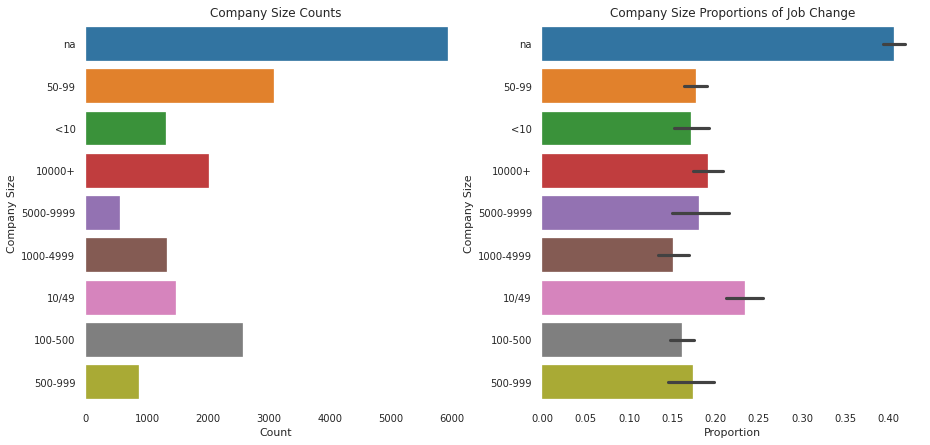

In [ ]:
plt.figure(figsize=(15,7))

plt.subplot(121)
sns.countplot(data=train, y='company_size')
plt.title('Company Size Counts')
plt.xlabel('Count')
plt.ylabel('Company Size');

plt.subplot(122)
sns.barplot(data=train, y='company_size', x='target')
plt.title('Company Size Proportions of Job Change')
plt.xlabel('Proportion')
plt.ylabel('Company Size');

company sizes mostly not mentioned in the data set. 

In [ ]:
comp_size_table = pd.crosstab(train['company_size'],train['target'])
pd.crosstab(train['company_size'],train['target'], normalize = 'index')

target             0.0       1.0
company_size                    
10/49         0.766145  0.233855
100-500       0.838584  0.161416
1000-4999     0.849398  0.150602
10000+        0.809312  0.190688
50-99         0.823224  0.176776
500-999       0.826682  0.173318
5000-9999     0.818828  0.181172
<10           0.828746  0.171254
na            0.594139  0.405861

People who have a missing value for their company size are more likely to change jobs than any other value.

In [ ]:
stat, p, dof, expected = chi2_contingency(comp_size_table)

# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 1.5874534712450328e-245
Dependent (reject H0)


We reject the null hypothesis because we definetly have a p value lower than .05. It looks like company size will be a good feature to add to our model.

### Company Type
Company type has 6 values (Pvt Ltd, Funded Startup, Public Sector, Early Stage Startup, NGO, Other).

In [ ]:
train['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

Private companies take up most of the data set.

We choose to fill missing values with na and use na as a value in this column.



In [ ]:
train['company_type'].fillna('na', inplace=True)

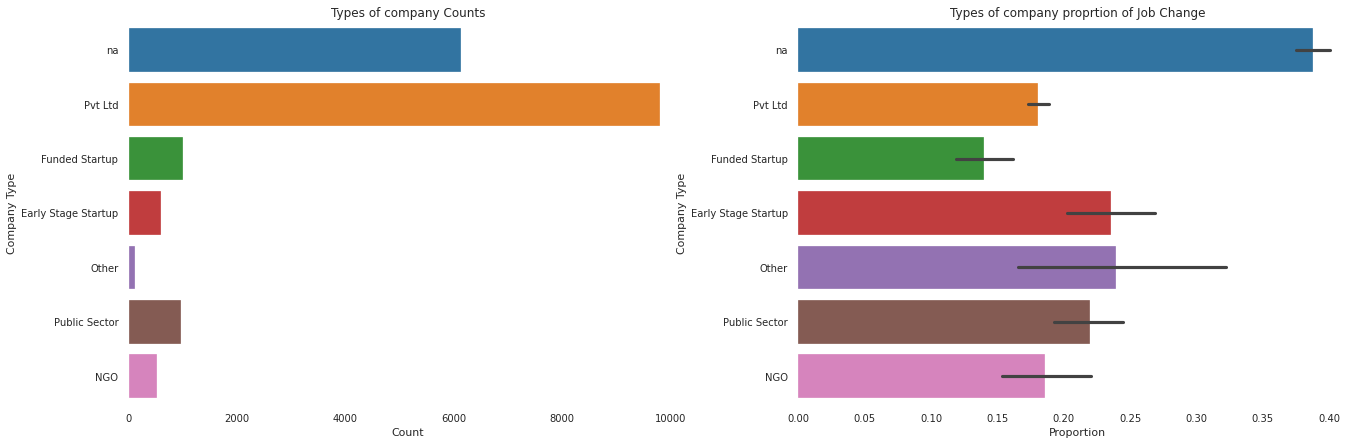

In [ ]:
plt.figure(figsize=(22,7))

plt.subplot(121)
sns.countplot(data=train, y='company_type')
plt.title('Types of company Counts')
plt.xlabel('Count')
plt.ylabel('Company Type');

plt.subplot(122)
sns.barplot(data=train, y='company_type', x='target')
plt.title('Types of company proprtion of Job Change')
plt.xlabel('Proportion')
plt.ylabel('Company Type');

Pvt Ltd takes up more than any other value. For job change proportions, there is a close tie between early stage startups and other types of companies.

In [ ]:
comp_type_table = pd.crosstab(train['company_type'],train['target'])
pd.crosstab(train['company_type'],train['target'], normalize = 'index')

target                    0.0       1.0
company_type                           
Early Stage Startup  0.764511  0.235489
Funded Startup       0.860140  0.139860
NGO                  0.813820  0.186180
Other                0.760331  0.239669
Public Sector        0.780105  0.219895
Pvt Ltd              0.819191  0.180809
na                   0.611726  0.388274

In [ ]:
stat, p, dof, expected = chi2_contingency(comp_type_table)

# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 4.351920136429758e-204
Dependent (reject H0)


We reject the null hypothesis because we definitely have a p value lower than .05. It looks like company type will be a good feature to add to our model.

## Continious Variables



### City development index

In [ ]:
train['city_development_index'].describe()

count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

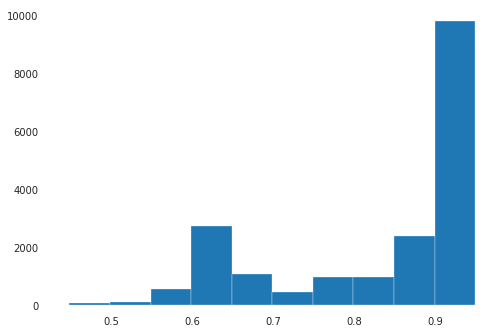

In [ ]:
plt.hist(data=train, x='city_development_index');

Most of the records have a city development index higher than .9.

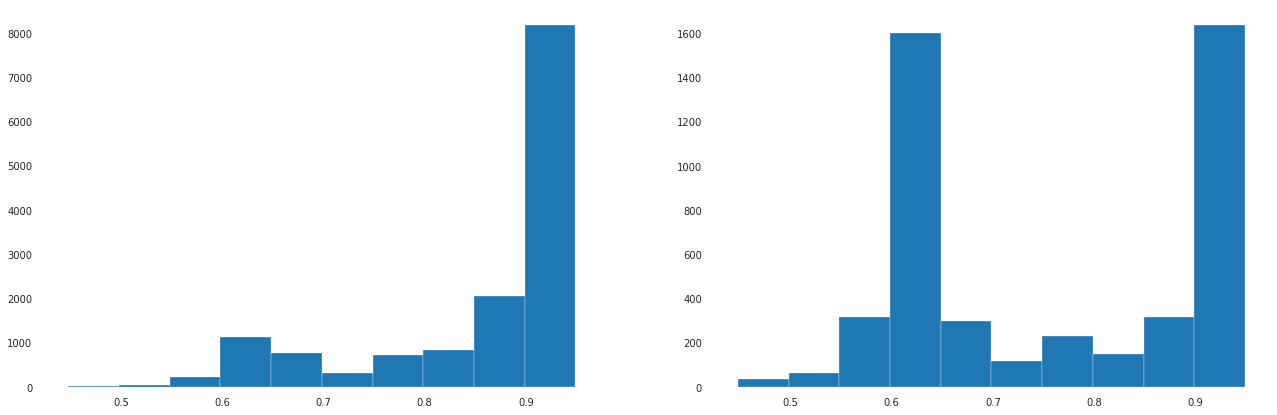

In [ ]:
plt.figure(figsize=(22,7))

plt.subplot(121)
plt.hist(data=train[train['target'] == 0], x='city_development_index', label='target = 0')

plt.subplot(122)
plt.hist(data=train[train['target'] == 1], x='city_development_index', label='target = 1')
plt.show()

The distribution of the not looking for jobs histogram on the left seems to be very similar to the distribution of all the records. The job changers have a very high amount of records between .6 and .7 .

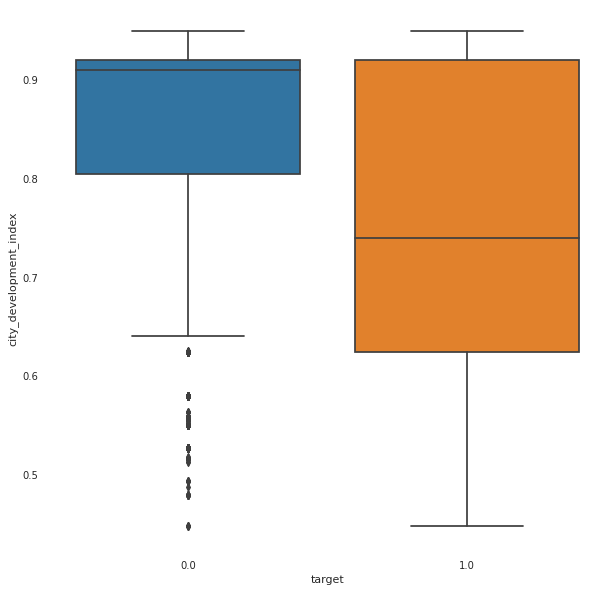

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=train, x='target', y='city_development_index')
plt.show()

This box plot shows a pretty large difference between the mean of job changers to non job changers.

Let's do a statstical test to make sure of this.

Here we us a Kruskal Wallace Test to see if there is a statistically significant difference.

In [ ]:
no_change_train = train[train['target'] == 0]
change_train =  train[train['target'] == 1]

In [ ]:
stats.kruskal(no_change_train['city_development_index'], change_train['city_development_index'])

KruskalResult(statistic=1492.9657480578917, pvalue=0.0)

We have a very small p-value that is below 0.05, so we reject the null hypothesis. This shows statistical significance so it should be a great variable to use for our model.

### Experience

Experience is measured in years of experience going from less than 1 to more than 20.

In [ ]:
train['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

We are going to change >20 to 20, and < 1 to 0 so we can have a consistent data type and the values can be readable to our model. 

We also choose to fill missing values with a random value of experience.

In [ ]:
train['experience'] = train['experience'].replace('>20', 20)
train['experience'] = train['experience'].replace('<1', 0)
train['experience'] = train['experience'].fillna(np.random.choice(train['experience']))

Then change the data type to a float so it is numerical.

In [ ]:
train['experience'] = train['experience'].astype('float64')

Now we check it out!

In [ ]:
train['experience'].describe()

count    19158.000000
mean         9.928281
std          6.494224
min          0.000000
25%          4.000000
50%          9.000000
75%         16.000000
max         20.000000
Name: experience, dtype: float64

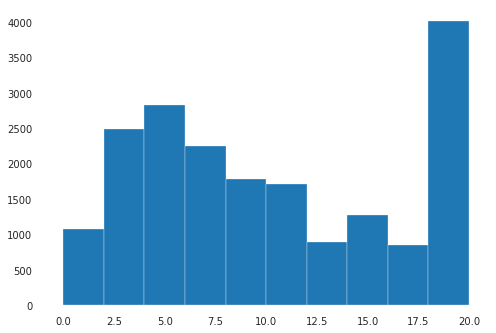

In [ ]:
plt.hist(data=train, x='experience');

The highst distribution of records in the data set have 20 or more years of experience followed by 4,5,and 6 years of experience.

Lets look at job changers vs non-job changers.

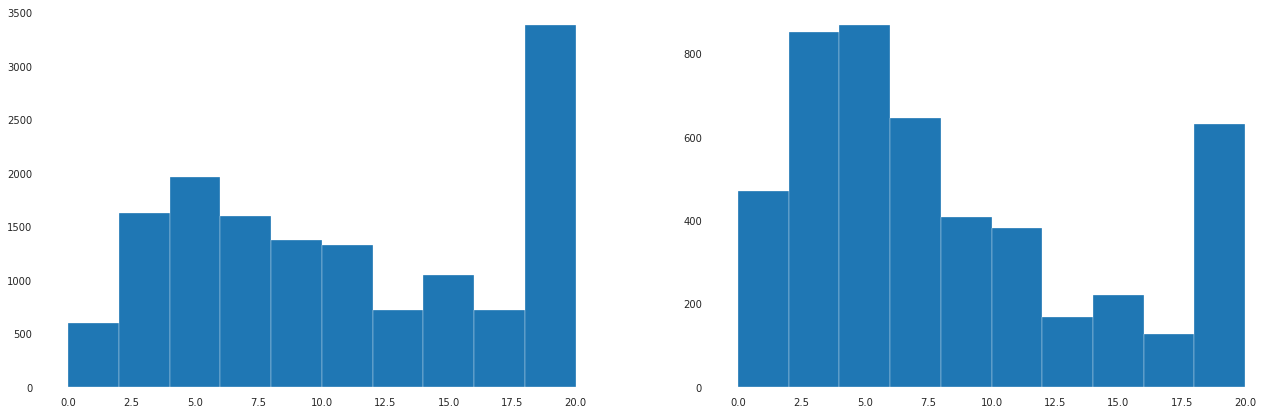

In [ ]:
plt.figure(figsize=(22,7))

plt.subplot(121)
plt.hist(data=train[train['target'] == 0], x='experience')

plt.subplot(122)
plt.hist(data=train[train['target'] == 1], x='experience');

When comparing both graphs we see that in the job changers histogram, there is a high frequency of records between 1-7 years of job experience and then another spike at 20 years and over. 

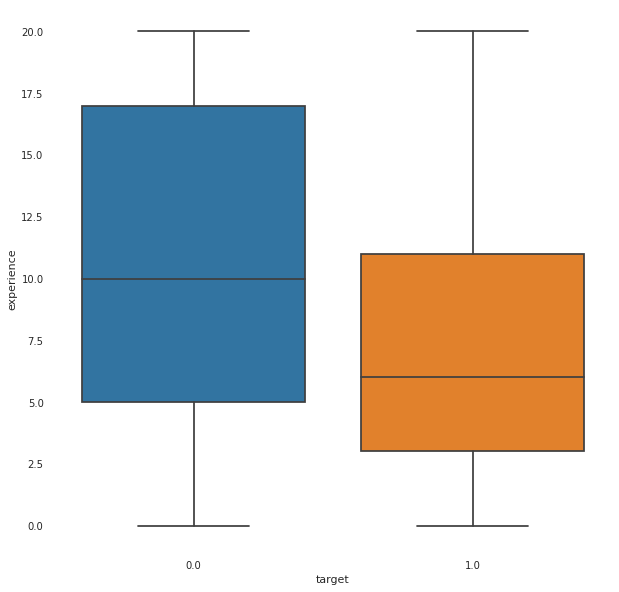

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=train, x='target', y='experience')
plt.show()

It looks like job changers are more likely to change having less experience years.

Lets do a Kruskal Wallace test to see if that difference is significant.

In [ ]:
no_change_train = train[train['target'] == 0]
change_train =  train[train['target'] == 1]

stats.kruskal(no_change_train['experience'], change_train['experience'])

KruskalResult(statistic=640.5607761376114, pvalue=2.5233606448535307e-141)

We have a very small p-value that is below 0.05, so we reject the null hypothesis. This shows statistical significance so it should be a good variable to use for our model.

### Last New Job

Difference in years between previous job and current job.

In [ ]:
train['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

We will need to clean this up a bit:
- Replace >4 to 5, and never to 0 years between jobs.
- We fill missing data with random samples taken from the existing data set.
- We change the data type to a float so it is numerical.

In [ ]:
train['last_new_job'] = train['last_new_job'].replace('>4', 5)
train['last_new_job'] = train['last_new_job'].replace('never', 0)
train['last_new_job'] = train['last_new_job'].fillna(np.random.choice(train['last_new_job']))
train['last_new_job'] = train['last_new_job'].astype('float64')

After cleaning, we visualize the variable.

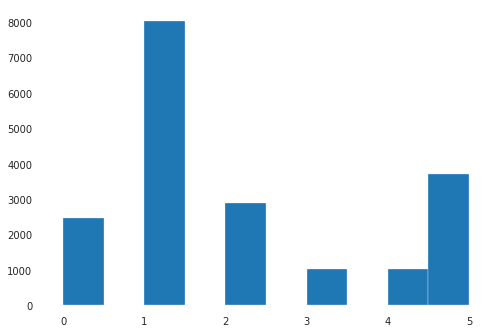

In [ ]:
plt.hist(data=train, x='last_new_job');

Most records have a difference of 1 year between jobs.

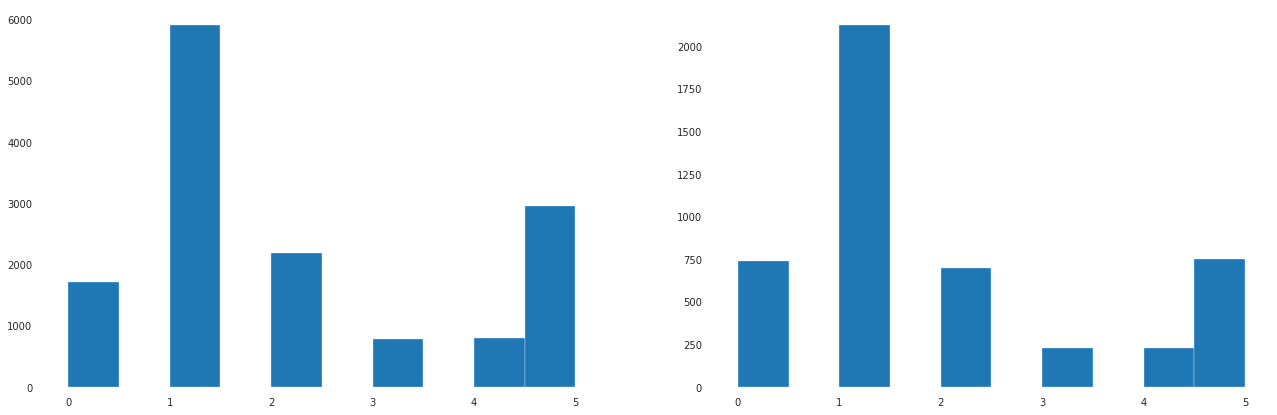

In [ ]:
plt.figure(figsize=(22,7))

plt.subplot(121)
plt.hist(data=train[train['target'] == 0], x='last_new_job')

plt.subplot(122)
plt.hist(data=train[train['target'] == 1], x='last_new_job');

We do not see much of a difference in the histogram distrubtions of job seekers and non-job seekers.

Lets try a box plot!

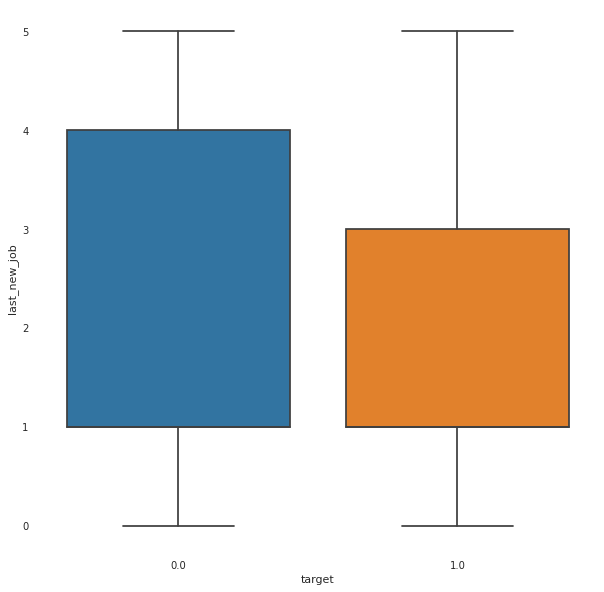

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=train, x='target', y='last_new_job');

It seems that people who change jobs seem to have lower year differences. Maybe people who have been on same job longer may not want to change jobs again. 

We do another Kruskal Wallace test.

In [ ]:
no_change_train = train[train['target'] == 0]
change_train =  train[train['target'] == 1]

stats.kruskal(no_change_train['last_new_job'], change_train['last_new_job'])

KruskalResult(statistic=94.68665535903801, pvalue=2.230377032492294e-22)

The results of the test are significant with a p-value lower than .05. We will use this feature in our model.

 ### training_hours
 
 The number of hours of training for employee's current position.

In [ ]:
train['training_hours'].describe()

count    19158.000000
mean        65.366896
std         60.058462
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

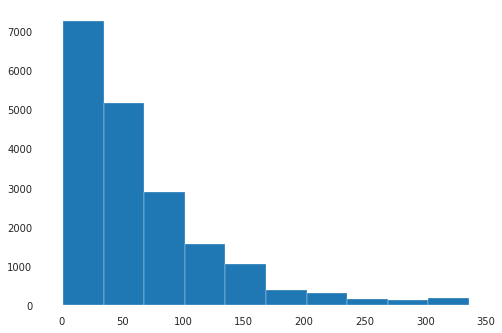

In [ ]:
plt.hist(data=train, x='training_hours');

There is a median of 47 training hours and most records are between 0 and 50 training hours.

Next we plot the distributions for job seekers and non-job seekers.

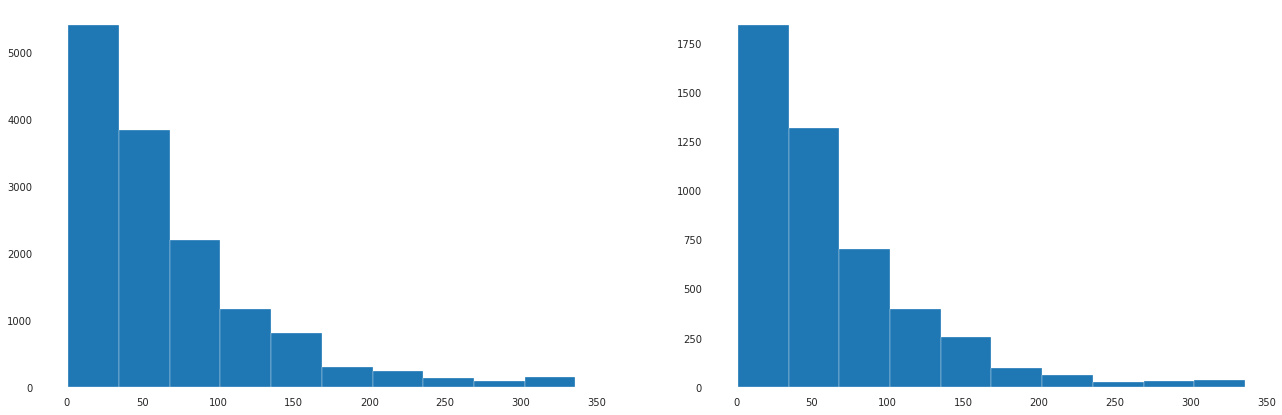

In [ ]:
plt.figure(figsize=(22,7))

plt.subplot(121)
plt.hist(data=train[train['target'] == 0], x='training_hours')

plt.subplot(122)
plt.hist(data=train[train['target'] == 1], x='training_hours');

The distributions follow similar pattern.

Let's try a boxplot.

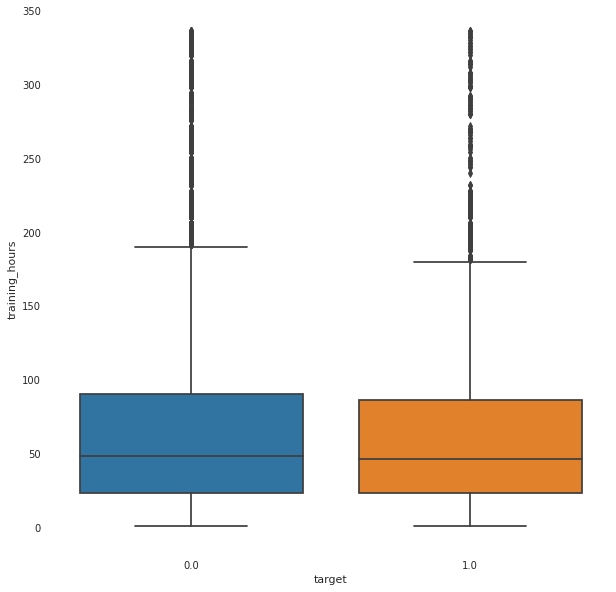

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=train, x='target', y='training_hours')
plt.show()

Again the distributions follows similar pattern.

In [ ]:
no_change_train = train[train['target'] == 0]
change_train =  train[train['target'] == 1]

stats.kruskal(no_change_train['training_hours'], change_train['training_hours'])

KruskalResult(statistic=3.8227951544685324, pvalue=0.05055982720157598)

In this Kruskal Wallace test, we get a p-value greater than .05. We fail to reject the Null-Hypothesis. This means that there are no significant differences between job changers and non-job changers with **training hours so training hours will not be used for the model**.

# Model Building and Implementation

## Model Preparation


Split the data to X as features and y as label.

Then splitting X and y into training and validation features and labels.


In [ ]:
train = pd.read_csv("aug_train.csv")
test = pd.read_csv("aug_test.csv")

In [ ]:
print(train.shape)
print(test.shape)

(19158, 14)
(2129, 13)


In [ ]:
train['target'].unique()

array([1., 0.])

In [ ]:
# replace the value has relevent experience to "yes" and no relevent experience to "no" in the column.
train['relevent_experience'] = train['relevent_experience'].replace('Has relevent experience', 'yes')
train['relevent_experience'] = train['relevent_experience'].replace('No relevent experience', 'no')

# Change pandas na to an actual na value.
train['gender'].fillna('na', inplace=True)
train['major_discipline'].fillna('na', inplace=True)
train['company_size'].fillna('na', inplace=True)
train['company_type'].fillna('na', inplace=True)
train['enrolled_university'].fillna('na', inplace=True)
train['education_level'].fillna('na', inplace=True)


train['experience'] = train['experience'].replace('>20', 20)
train['experience'] = train['experience'].replace('<1', 0)
train['experience'] = train['experience'].fillna(np.random.choice(train['experience'],replace=True))

train['last_new_job'] = train['last_new_job'].replace('>4', 5)
train['last_new_job'] = train['last_new_job'].replace('never', 0)
train['last_new_job'] = train['last_new_job'].fillna(np.random.choice(train['last_new_job'],replace=True))


In [ ]:
train['last_new_job'] = train['last_new_job'].astype('float64')
train['experience'] = train['experience'].astype('float64')
train['training_hours'] = train['training_hours'].astype(str).astype(int)

When categorical features in the dataset contain variables with many levels (also known as *high cardinality features*), then typical One Hot Encoding leads to creation of a very large number of new features, thereby making the experiment slow and introduces probable noise for certain machine learning algorithms.

Here we are dropping the feature city due to high cardinality.

The disadvantage is that for high cardinality, the feature space can really blow up quickly and you start fighting with the curse of dimensionality.

There are two different ways to encoding categorical variables. 
Say, one categorical variable has n values. 

* One-hot encoding converts it into n variables, 
* while dummy encoding converts it into (n-1) variables. 

If we have k categorical variables, each of which has n values. One hot encoding ends up with kn variables, while dummy encoding ends up with (kn-k) variables.

In [ ]:
train['count'] = 1

list_of_columns = [ 'gender', 'relevent_experience', 'enrolled_university', 'education_level',
                   'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']

aug_train_dummies_df = []

for col in list_of_columns:
    dummy_train_df = pd.get_dummies(train[col])
    aug_train_dummies_df.append(dummy_train_df)


list_of_columns.append('enrollee_id')    
aug_train_dummies_df.insert(0, train.drop(columns=list_of_columns))

train = pd.concat(aug_train_dummies_df,axis=1)
train = train.drop('count', 1)


In [ ]:
X = train.dropna().drop(columns=['city','target']).values
y = train.dropna()['target'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=12)

## Model Selection

### Defining model functions

**This is a function to plot the ROC curve for each model.**

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

**This function efficiently trains each model on the training data and makes predictions for our validation set.**

In [ ]:
def fit_model(model):
    print("\n Model: ", model)
    model.fit(X_train, y_train)
    val_preds = model.predict(X_val)
    print(pd.DataFrame(confusion_matrix(y_val,val_preds),\
            columns=["Predicted No", "Predicted Yes"],\
            index=["No","Yes"]))
    print('\n')
    print(classification_report(y_val, val_preds))
    
    probs = model.predict_proba(X_val)
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, probs)
    plot_roc_curve(fpr,tpr)
    print('auc score: '+ str(roc_auc_score(y_val,val_preds)))
    

**Initializing each model**

In [ ]:
rf = sklearn.pipeline.Pipeline(steps=[('SS', StandardScaler()), ('RF', RandomForestClassifier(n_estimators=600, random_state=12))])
lg = sklearn.pipeline.Pipeline(steps=[('SS', StandardScaler()), ('LR', LogisticRegression(random_state=12))])
svc = sklearn.pipeline.Pipeline(steps=[('SS', StandardScaler()), ('SVC', SVC(kernel='rbf', probability=True))])
dt = sklearn.pipeline.Pipeline(steps=[('SS', StandardScaler()), ('DT', DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10, random_state=12))])
knn = sklearn.pipeline.Pipeline(steps=[('SS', StandardScaler()), ('KNN', KNeighborsClassifier(n_neighbors=50))])


## Model Fitting

### Logistic Regression


 Model:  Pipeline(memory=None,
         steps=[('SS',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('LR',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=12,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
     Predicted No  Predicted Yes
No           4072            272
Yes           987            417


              precision    recall  f1-score   support

         0.0       0.80      0.94      0.87      4344
         1.0       0.61      0.30      0.40      1404

    accuracy                           0.78      5748
   macro avg       

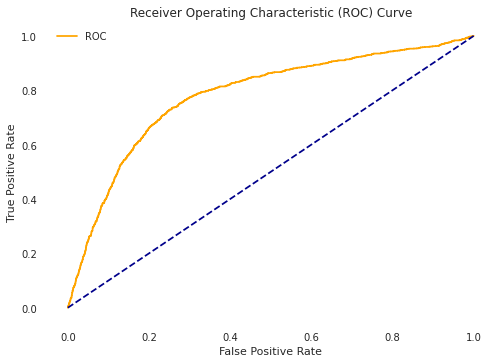

auc score: 0.6171967228597063


In [ ]:
fit_model(lg)

### K-nearest Neighbors


 Model:  Pipeline(memory=None,
         steps=[('SS',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=50, p=2,
                                      weights='uniform'))],
         verbose=False)
     Predicted No  Predicted Yes
No           4141            203
Yes          1144            260


              precision    recall  f1-score   support

         0.0       0.78      0.95      0.86      4344
         1.0       0.56      0.19      0.28      1404

    accuracy                           0.77      5748
   macro avg       0.67      0.57      0.57      5748
weighted avg       0.73      0.77      0.72      5748



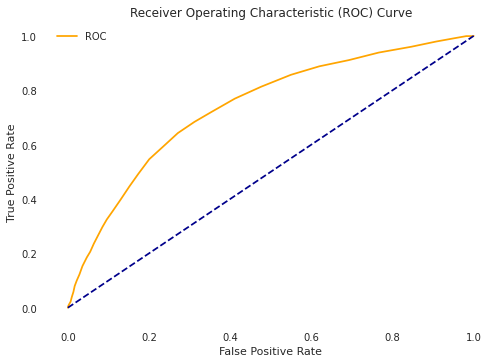

auc score: 0.5692270308983016


In [ ]:
fit_model(knn)

### Support Vector Machines


 Model:  Pipeline(memory=None,
         steps=[('SS',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SVC',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)
     Predicted No  Predicted Yes
No           4065            279
Yes          1000            404


              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86      4344
         1.0       0.59      0.29      0.39      1404

    accuracy                           0.78      5748
   macro avg       0.70      0.61      0.63      5748
weighted avg       0.75      0.78      0.75      5748



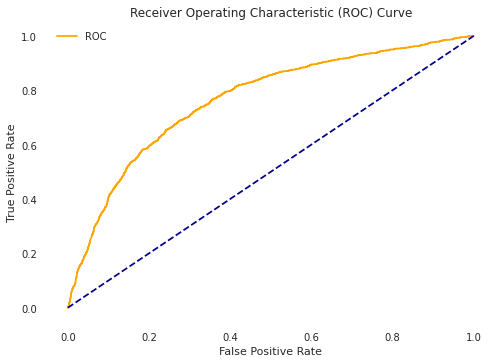

auc score: 0.6117613842061356


In [ ]:
fit_model(svc)

### Decision Tree Classifier


 Model:  Pipeline(memory=None,
         steps=[('SS',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('DT',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=6,
                                        max_features=None, max_leaf_nodes=10,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=12,
                                        splitter='best'))],
         verbose=False)
     Predicted No  Predicted Yes
No           3808            536
Yes           646            758


              precision    recall  f1-score   support

         0.0      

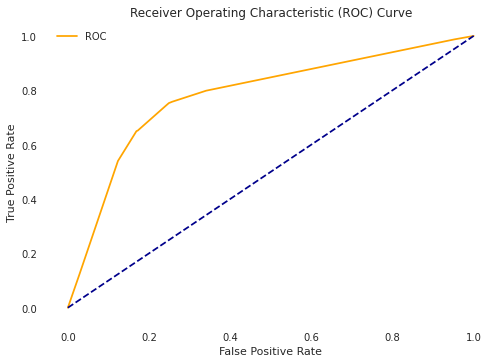

auc score: 0.708248728966961


In [ ]:
fit_model(dt)

### Random Forest Classifier


 Model:  Pipeline(memory=None,
         steps=[('SS',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('RF',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=600, n_jobs=None,
                                        oob_score=False, random_state=12,
                                        verbose=0, warm_start=False))],
         verbose=False)
     Predicted No 

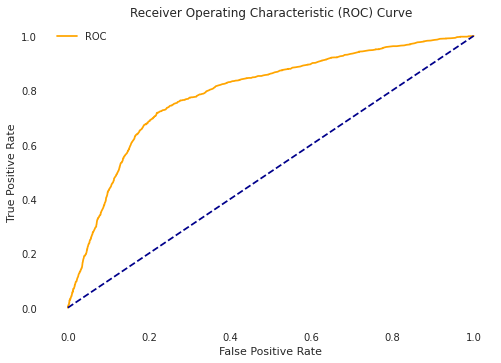

auc score: 0.6685309140419639


In [ ]:
fit_model(rf)

Warning: SVC takes a long time for execution.

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

svc.fit(X_train, y_train)
rf.fit(X_train, y_train)
lg.fit(X_train, y_train)
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)

svc_pred = svc.predict(X_val)
rf_pred  = rf.predict(X_val)
lg_pred  = lg.predict(X_val)
dt_pred  = dt.predict(X_val)
knn_pred = knn.predict(X_val)

svc_f1   = f1_score(y_val, svc_pred)
rf_f1    = f1_score(y_val, rf_pred)
lg_f1    = f1_score(y_val, lg_pred)
dt_f1    = f1_score(y_val, dt_pred)
knn_f1   = f1_score(y_val, knn_pred)

## Implementing SMOTE

Here, sampling with replacement is applied to the minority class to create as many observations as there are in the majority class and the two classes are balanced. This is called oversampling or upsampling the minority class.

*Issue: Repetition of the same minority class data leads to overfitting.*


**SMOTE (Synthetic Minority Oversampling Technique) – Oversampling. 
SMOTE is a technique that helps deal with imbalanced data sets.**



* First split your data first, and 
* THEN use SMOTE on the training data only.


**DO NOT** use SMOTE and THEN split data into train & test sets. This is a mistake because one will get some serious data leakage and end up predicting synthetic results that have just been created. 

Let's see if it helps here...

In [ ]:
#  data is unbalanced, we can fix this with SMOTE

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

In [ ]:
def fit_model_smote(model):
    print("\n Model: ",model)
    model.fit(X_train_resh, y_train_resh)
    val_preds = model.predict(X_val)
    print(pd.DataFrame(confusion_matrix(y_val,val_preds),\
            columns=["Predicted No", "Predicted Yes"],\
            index=["No","Yes"]))
    print('\n')
    print(classification_report(y_val, val_preds))
    
    probs = model.predict_proba(X_val)
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, probs)
    plot_roc_curve(fpr,tpr)
    print('auc score: '+ str(roc_auc_score(y_val,val_preds)))
    

Retraining the classifiers

### Logistic Regression


 Model:  Pipeline(memory=None,
         steps=[('SS',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('LR',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=12,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
     Predicted No  Predicted Yes
No           3231           1113
Yes           383           1021


              precision    recall  f1-score   support

         0.0       0.89      0.74      0.81      4344
         1.0       0.48      0.73      0.58      1404

    accuracy                           0.74      5748
   macro avg       

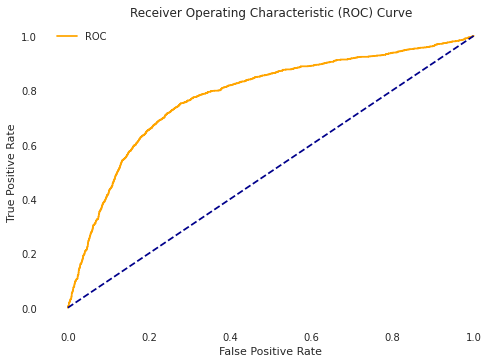

auc score: 0.7354962537973588


In [ ]:
fit_model_smote(lg)

### K Nearest Neighbors


 Model:  Pipeline(memory=None,
         steps=[('SS',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=50, p=2,
                                      weights='uniform'))],
         verbose=False)
     Predicted No  Predicted Yes
No           3088           1256
Yes           486            918


              precision    recall  f1-score   support

         0.0       0.86      0.71      0.78      4344
         1.0       0.42      0.65      0.51      1404

    accuracy                           0.70      5748
   macro avg       0.64      0.68      0.65      5748
weighted avg       0.76      0.70      0.71      5748



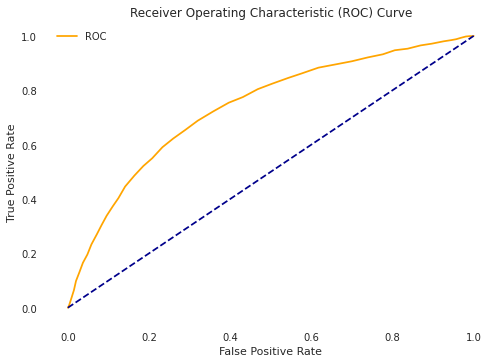

auc score: 0.6823558577702223


In [ ]:
fit_model_smote(knn)

### Support Vector Machines


 Model:  Pipeline(memory=None,
         steps=[('SS',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SVC',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)
     Predicted No  Predicted Yes
No           3558            786
Yes           590            814


              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      4344
         1.0       0.51      0.58      0.54      1404

    accuracy                           0.76      5748
   macro avg       0.68      0.70      0.69      5748
weighted avg       0.77      0.76      0.77      5748



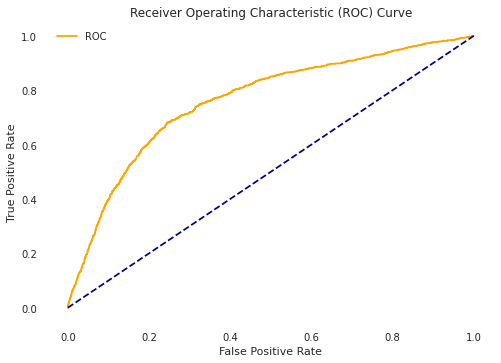

auc score: 0.6994164266263714


In [ ]:
fit_model_smote(svc)

### Decision Tree Classifier


 Model:  Pipeline(memory=None,
         steps=[('SS',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('DT',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=6,
                                        max_features=None, max_leaf_nodes=10,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=12,
                                        splitter='best'))],
         verbose=False)
     Predicted No  Predicted Yes
No           3383            961
Yes           422            982


              precision    recall  f1-score   support

         0.0      

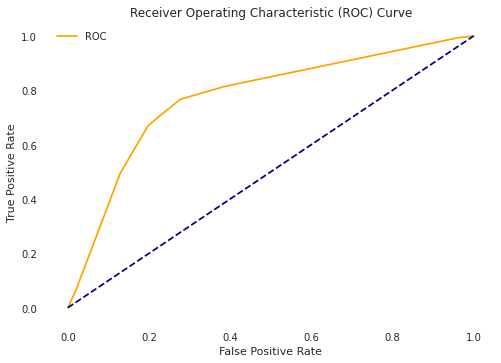

auc score: 0.7391027608569045


In [ ]:
fit_model_smote(dt)

### Random Forest Classifier


 Model:  Pipeline(memory=None,
         steps=[('SS',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('RF',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=600, n_jobs=None,
                                        oob_score=False, random_state=12,
                                        verbose=0, warm_start=False))],
         verbose=False)
     Predicted No 

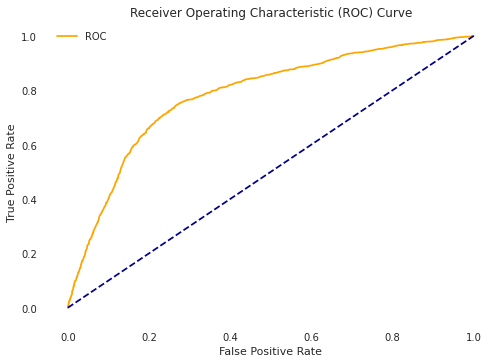

auc score: 0.6660960790795045


In [ ]:
fit_model_smote(rf)

Performance

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

svc.fit(X_train_resh,y_train_resh)
rf.fit(X_train_resh,y_train_resh)
lg.fit(X_train_resh,y_train_resh)
dt.fit(X_train_resh,y_train_resh)
knn.fit(X_train_resh,y_train_resh)

svc_pred_smote = svc.predict(X_val)
rf_pred_smote  = rf.predict(X_val)
lg_pred_smote  = lg.predict(X_val)
dt_pred_smote  = dt.predict(X_val)
knn_pred_smote = knn.predict(X_val)

svc_f1_smote   = f1_score(y_val, svc_pred_smote)
rf_f1_smote    = f1_score(y_val, rf_pred_smote)
lg_f1_smote    = f1_score(y_val, lg_pred_smote)
dt_f1_smote    = f1_score(y_val, dt_pred_smote)
knn_f1_smote   = f1_score(y_val, knn_pred_smote)

## Implementing Borderline SMOTE



There are many oversampling techniques that one could employ. 

A variation of the technique used above is **Borderline SMOTE**.

If there are observations in the minority class which are outlying and appears in the majority class, it causes a problem for SMOTE, by creating a line bridge with the majority class.

Borderline SMOTE solves the above issue.

* Ignores noise points and normal minority point.

* Use border points for synthetic data generation.


This algorithm starts by classifying the minority class observations. It classifies any minority observation as a noise point if all the neighbors are the majority class and such an observation is ignored while creating synthetic data (Similar to DBSCAN). Further, it classifies a few points as border points that have both majority and minority class as neighborhood and resample completely from these points (Extreme observations on which a support vector will typically pay attention to).

*Issue: End up giving more attention to these extreme observations.*





In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
oversample = BorderlineSMOTE()
X_train_resh_bord, y_train_resh_bord = oversample.fit_resample(X_train, y_train.ravel())

In [ ]:
def fit_model_bord_smote(model):
    print("\n Model: ",model)
    model.fit(X_train_resh_bord, y_train_resh_bord)
    val_preds = model.predict(X_val)
    print(pd.DataFrame(confusion_matrix(y_val,val_preds),\
            columns=["Predicted No", "Predicted Yes"],\
            index=["No","Yes"]))
    print('\n')
    print(classification_report(y_val, val_preds))
    
    probs = model.predict_proba(X_val)
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, probs)
    plot_roc_curve(fpr,tpr)
    print('auc score: '+ str(roc_auc_score(y_val,val_preds)))
    

Retraining the classifiers

### Logistic Regression


 Model:  Pipeline(memory=None,
         steps=[('SS',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('LR',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=12,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
     Predicted No  Predicted Yes
No           3228           1116
Yes           389           1015


              precision    recall  f1-score   support

         0.0       0.89      0.74      0.81      4344
         1.0       0.48      0.72      0.57      1404

    accuracy                           0.74      5748
   macro avg       

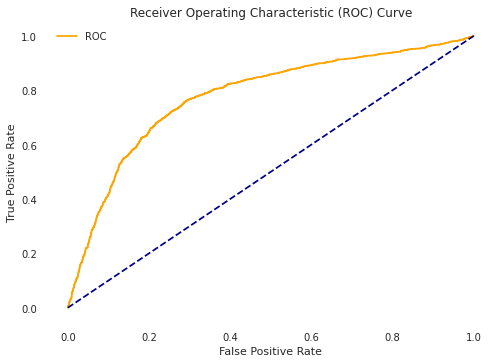

auc score: 0.7330141977932033


In [ ]:
fit_model_bord_smote(lg)

### K Nearest Neighbors


 Model:  Pipeline(memory=None,
         steps=[('SS',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=50, p=2,
                                      weights='uniform'))],
         verbose=False)
     Predicted No  Predicted Yes
No           3038           1306
Yes           453            951


              precision    recall  f1-score   support

         0.0       0.87      0.70      0.78      4344
         1.0       0.42      0.68      0.52      1404

    accuracy                           0.69      5748
   macro avg       0.65      0.69      0.65      5748
weighted avg       0.76      0.69      0.71      5748



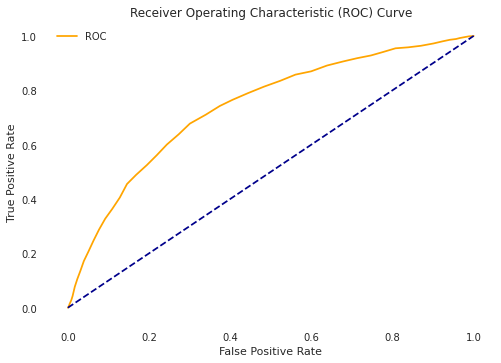

auc score: 0.6883529300656372


In [ ]:
fit_model_bord_smote(knn)

### Support Vector Machines


 Model:  Pipeline(memory=None,
         steps=[('SS',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SVC',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)
     Predicted No  Predicted Yes
No           3522            822
Yes           564            840


              precision    recall  f1-score   support

         0.0       0.86      0.81      0.84      4344
         1.0       0.51      0.60      0.55      1404

    accuracy                           0.76      5748
   macro avg       0.68      0.70      0.69      5748
weighted avg       0.77      0.76      0.77      5748



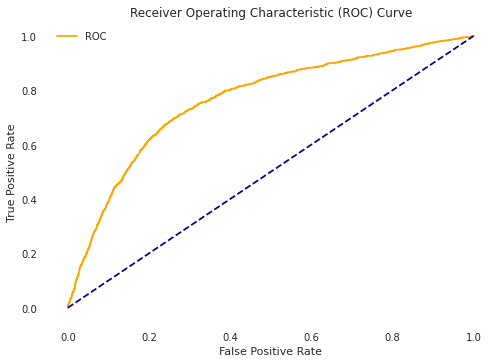

auc score: 0.7045320394767909


In [ ]:
fit_model_bord_smote(svc)

### Decision Tree Classifier


 Model:  Pipeline(memory=None,
         steps=[('SS',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('DT',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=6,
                                        max_features=None, max_leaf_nodes=10,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=12,
                                        splitter='best'))],
         verbose=False)
     Predicted No  Predicted Yes
No           3427            917
Yes           430            974


              precision    recall  f1-score   support

         0.0      

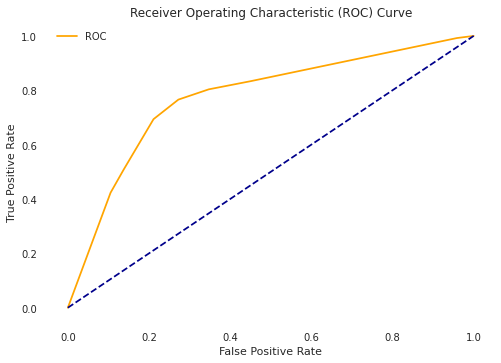

auc score: 0.7413182147298168


In [ ]:
fit_model_bord_smote(dt)

### Random Forest Classifier


 Model:  Pipeline(memory=None,
         steps=[('SS',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('RF',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=600, n_jobs=None,
                                        oob_score=False, random_state=12,
                                        verbose=0, warm_start=False))],
         verbose=False)
     Predicted No 

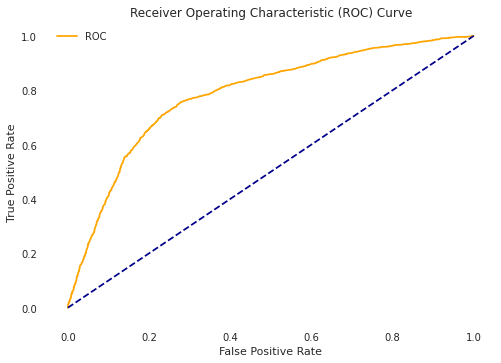

auc score: 0.6699809935307173


In [ ]:
fit_model_bord_smote(rf)

Performance

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

svc.fit(X_train_resh_bord, y_train_resh_bord)
rf.fit(X_train_resh_bord, y_train_resh_bord)
lg.fit(X_train_resh_bord, y_train_resh_bord)
dt.fit(X_train_resh_bord, y_train_resh_bord)
knn.fit(X_train_resh_bord, y_train_resh_bord)

svc_pred_bord_smote = svc.predict(X_val)
rf_pred_bord_smote  = rf.predict(X_val)
lg_pred_bord_smote  = lg.predict(X_val)
dt_pred_bord_smote  = dt.predict(X_val)
knn_pred_bord_smote = knn.predict(X_val)

svc_f1_bord_smote   = f1_score(y_val, svc_pred_bord_smote)
rf_f1_bord_smote    = f1_score(y_val, rf_pred_bord_smote)
lg_f1_bord_smote    = f1_score(y_val, lg_pred_bord_smote)
dt_f1_bord_smote    = f1_score(y_val, dt_pred_bord_smote)
knn_f1_bord_smote  = f1_score(y_val, knn_pred_bord_smote)

# Confusion Matrix and ROC

A confusion matrix for a problem involving n classes is an n x n matrix with the columns labeled with actual classes and the rows labeled with predicted classes. In the confusion matrix, the main diagonal contains the counts of correct decisions. The errors are false positives and false negatives.

<br>

* True Positive (TP): Correct classification of yes examples.
<br>
* False Negative (FN): Incorrect classification of yes examples.
<br>
* False Positive (FP): Incorrect classification of no examples.
<br>
* True Negative (TN): Correct classification of no examples.

**Recall**

Recall or True Positive Rate

 * TPR = TP/(TP + FN)


When False Negative decreases, Recall increases.

**Precision**

Precision or Positive Predictive Rate

  * PPV = TP/(TP + FP)

When False Positive decreases, Precision increases.

**A ROC (Receiver Operating Characteristic)**

<br>

A ROC (Receiver Operating Characteristic) graph is a 2-dimensional plot of a classifier with false positive rate on x-axis against true positive rate on y-axis. As such, ROC graph depicts relative trade-offs that a classifier makes between True Positives and False Positives.



ROC curve from the data after calculating the TPR, FPR for each class.


 * TPR = TP/(TP + FN)


 * FPR = FP / (FP + TN)


## Confusion Matrix Analysis of this project

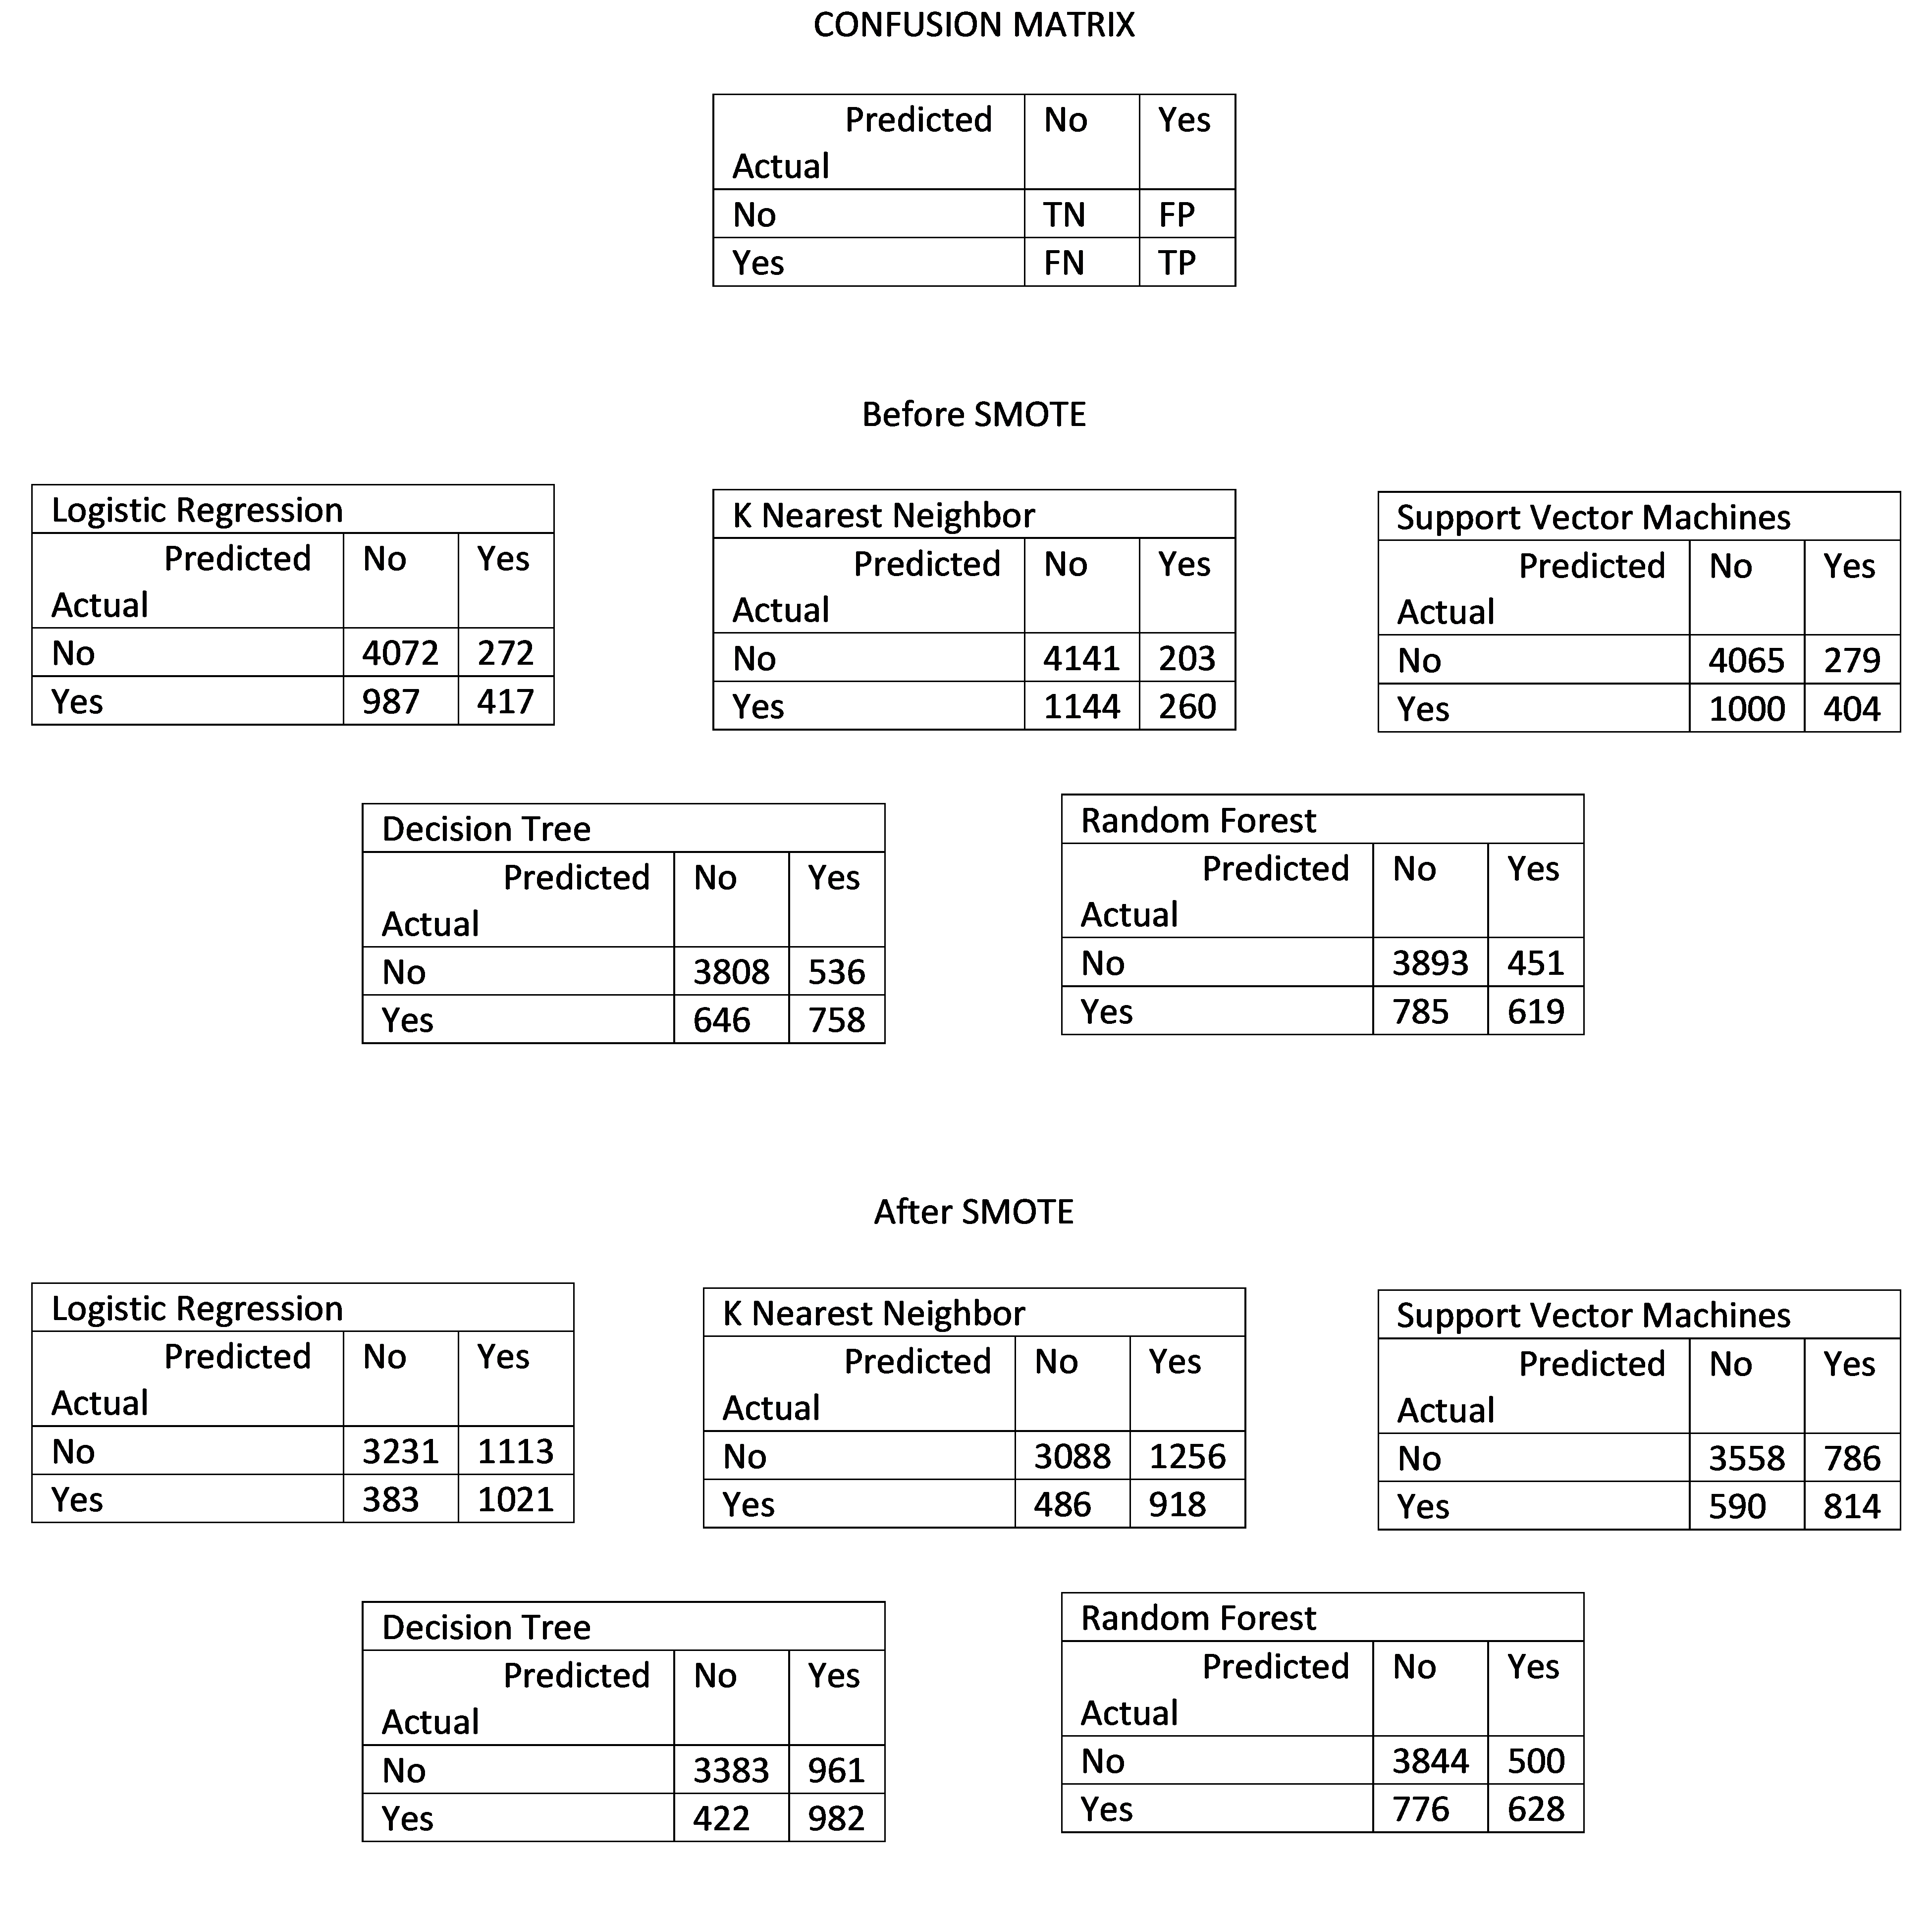

**Before SMOTE**

There were 987 people who was job seekers who is predicted incorrectly using Logistic Regression.

**After SMOTE**

There were 383 people who was job seekers who is predicted incorrectly using Logistic Regression.


*That's because this technique puts more weight to the small class, makes the model bias to it. The model will now predict the small class with higher accuracy but the overall accuracy will decrease.*


**Observation:** 

* By using SMOTE, we can increase recall at the cost of precision.


# Accuracy and F1 Scores

**Accuracy** 

One of the more obvious metrics, it is the measure of all the correctly identified cases. It is most used when all the classes are equally important.

* Accuracy = (TP + TN)/(TP + TN + FP + FN)

In [ ]:
print('Classifiers | Accuracy of Classifiers        |  Accuracy after SMOTE  |  Accuracy after Borderline SMOTE ')
print('SVC', '\t\t ',accuracy_score(y_val,svc_pred),'\t\t',accuracy_score(y_val,svc_pred_smote),'\t\t',accuracy_score(y_val,svc_pred_bord_smote))
print('RF', '\t\t ',accuracy_score(y_val,rf_pred),'\t\t',accuracy_score(y_val,rf_pred_smote),'\t\t',accuracy_score(y_val,rf_pred_bord_smote))
print('DT', '\t\t ',accuracy_score(y_val,dt_pred),'\t\t',accuracy_score(y_val,dt_pred_smote),'\t\t',accuracy_score(y_val,dt_pred_bord_smote))
print('LR', '\t\t ',accuracy_score(y_val,lg_pred),'\t\t',accuracy_score(y_val,lg_pred_smote),'\t\t',accuracy_score(y_val,lg_pred_bord_smote))
print('KNN', '\t\t ',accuracy_score(y_val,knn_pred),'\t\t',accuracy_score(y_val,knn_pred_smote),'\t\t',accuracy_score(y_val,knn_pred_bord_smote))

Classifiers | Accuracy of Classifiers        |  Accuracy after SMOTE  |  Accuracy after Borderline SMOTE 
SVC 		  0.7774878218510787 		 0.7606123869171886 		 0.7588726513569938
RF 		  0.7849686847599165 		 0.7780097425191371 		 0.7809672929714684
DT 		  0.7943632567849687 		 0.7593945720250522 		 0.7656576200417536
LR 		  0.7809672929714684 		 0.7397355601948504 		 0.738169798190675
KNN 		  0.7656576200417536 		 0.6969380654140571 		 0.6939805149617259


**Before SMOTE**

Accuracy of Decision Tree is 79% but there were 646 people who was job seekers who is predicted incorrectly.

**After SMOTE**

Accuracy of Decision Tree is 76% but there were 422 people who was job seekers who is predicted incorrectly.


*That's because this technique puts more weight to the small class, makes the model bias to it. The model will now predict the small class with higher accuracy but the overall accuracy will decrease.*

For these cases, we use the F1-score.

**F1-score**

This is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases than the Accuracy Metric.


* F1 score = 2 *  ((Precision * Recall)/(Precision + Recall))

In [ ]:
print('Classifiers   | F1 scores of Classifiers  | F1 scores after SMOTE  |  F1 scores after Borderline SMOTE ')
print('SVC', '\t\t ',svc_f1,'\t\t',svc_f1_smote,'\t\t',svc_f1_bord_smote)
print('RF', '\t\t ',rf_f1,'\t\t',rf_f1_smote,'\t\t',rf_f1_bord_smote)
print('DT', '\t\t ',dt_f1,'\t\t',dt_f1_smote,'\t\t',dt_f1_bord_smote)
print('LR', '\t\t ',lg_f1,'\t\t',lg_f1_smote,'\t\t',lg_f1_bord_smote)
print('KNN', '\t\t ',knn_f1,'\t\t',knn_f1_smote,'\t\t',knn_f1_bord_smote)

Classifiers   | F1 scores of Classifiers  | F1 scores after SMOTE  |  F1 scores after Borderline SMOTE 
SVC 		  0.38715860086248205 		 0.5419440745672437 		 0.547945205479452
RF 		  0.5004042037186742 		 0.4960505529225908 		 0.5025681548794942
DT 		  0.5618977020014826 		 0.5867941440095609 		 0.5911987860394537
LR 		  0.39847109412326803 		 0.5771622385528546 		 0.5742574257425742
KNN 		  0.2785216925549009 		 0.5131358300726663 		 0.5195301830101067


Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial.


**Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes as in this case.**

# Transformation on test data



Transformation done on training and validation data to be done on test data as well.

In [ ]:
test = pd.read_csv("aug_test.csv")

In [ ]:
# replace the value has relevent experience to "yes" and no relevent experience to "no" in the column.
test['relevent_experience'] = test['relevent_experience'].replace('Has relevent experience', 'yes')
test['relevent_experience'] = test['relevent_experience'].replace('No relevent experience', 'no')

# Change pandas na to an actual na value.
test['gender'].fillna('na', inplace=True)
test['major_discipline'].fillna('na', inplace=True)
test['company_size'].fillna('na', inplace=True)
test['company_type'].fillna('na', inplace=True)
test['enrolled_university'].fillna('na', inplace=True)
test['education_level'].fillna('na', inplace=True)


test['experience'] = test['experience'].replace('>20',20)
test['experience'] = test['experience'].replace('<1',0)
test['experience'] = test['experience'].fillna(np.random.choice(test['experience'],replace=True))

test['last_new_job'] = test['last_new_job'].replace('>4', 5)
test['last_new_job'] = test['last_new_job'].replace('never', 0)
test['last_new_job'] = test['last_new_job'].fillna(np.random.choice(test['last_new_job'],replace=True))


In [ ]:
test['last_new_job'] = test['last_new_job'].astype('float64')
test['experience'] = test['experience'].astype('float64')
test['training_hours'] = test['training_hours'].astype(str).astype(int)

In [ ]:
test['count'] = 1

list_of_columns = ['gender', 'relevent_experience', 'enrolled_university', 'education_level',
                   'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']

aug_test_dummies_df = []

for col in list_of_columns:
    dummy_test_df = pd.get_dummies(test[col])
    aug_test_dummies_df.append(dummy_test_df)


list_of_columns.append('enrollee_id')    
aug_test_dummies_df.insert(0, test.drop(columns=list_of_columns))

test = pd.concat(aug_test_dummies_df,axis=1)
test = test.drop('count', 1)
test = test.drop(columns=['city'])


Decision tree and Logistic Regression classifier can be used to make  prediction on test data.

### Submission file

In [ ]:
sub = pd.read_csv("sample_submission.csv")
sub1 = pd.read_csv("sample_submission.csv")

In [ ]:
# prediction on test data using logistic regression
y_preds_lg = lg.predict(test)
print(y_preds_lg)

[0. 1. 1. ... 0. 0. 0.]


In [ ]:
# prediction on test data using decision tree
y_preds_dt = dt.predict(test)
print(y_preds_dt)

[0. 1. 1. ... 0. 0. 0.]


Probablities of a person would move predicted on test data used as submission file in Kaggle.

In [ ]:
probabilities_lg = lg.predict_proba(test)
print(probabilities_lg)

[[0.61596067 0.38403933]
 [0.40583215 0.59416785]
 [0.24269986 0.75730014]
 ...
 [0.8319471  0.1680529 ]
 [0.75199289 0.24800711]
 [0.6181541  0.3818459 ]]


In [ ]:
probabilities_dt = dt.predict_proba(test)
print(probabilities_dt)

[[0.70272021 0.29727979]
 [0.31177446 0.68822554]
 [0.20923603 0.79076397]
 ...
 [0.86514523 0.13485477]
 [0.70272021 0.29727979]
 [0.70272021 0.29727979]]


In [ ]:
sub['target'] = np.round(probabilities_lg,1)
sub.to_csv('submission_lg.csv', index=False)

In [ ]:
sub1['target'] = np.round(probabilities_dt,1)
sub.to_csv('submission_dt.csv', index=False)

# Conclusion



We have explored and visualized our data in interesting ways.

Also,dealt with null values & performed feature engineering so get a more complete view of our data. Feature scaling is also done while modelling.

Finally, we performed several machine learning algorithms to try to predict whether or not someone would be a job seeker or not.

We looked at:

* Logisitic Regression Classifier
* K Nearest Neighbors Classifier
* Support Vector Machines Classifier
* Decision Trees Classifier
* Random Forests Classifier


Next, we looked at addressing the imbalance in our data. 

Using SMOTE, and then re-trained the models, all classifiers mentioned above. Using F1 score as measure of performance, the Decision tree model performed well and those were used as model for predicting.


By using SMOTE, we can increase recall(decrease False Negatives) at the cost of precision (that is decrease in precision meaning increase in False Positives).


Using Borderline SMOTE did not have much impact in terms of performance.

*Further Improvements can be made on*

* Models can utilize to better hyperparameter tuning.

* Complex Models like Light GBM can used.

* Working with catagorical features is difficult, especialy when using dummy encoding or One-Hot Encoding, this lead to a messy dataframe and longer computational. Label encoding can be used.

# References



> [7 Techniques to Handle Imbalanced Data](https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html)

> https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

> https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/


> https://towardsdatascience.com/class-imbalance-smote-borderline-smote-adasyn-6e36c78d804

Referring to others work has helped explore and understand the data and methods performed. 

> Please find analysis of 2 of many available works on Kaggle in doc - Review Others' work.